In [30]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Link -> https://www.kaggle.com/datasets/shashankrapolu/human-action-recognition-dataset

In [31]:
# Importing Utilities
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import statsmodels.api as sm

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

In [33]:
#To access files from Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Importing Dataset for Mobile Health Human Behaviour Analysis
file_path = '/content/drive/MyDrive/Colab Notebooks/1Stop AIML/ML Dataset/HumanActionDetection.csv'
df = pd.read_csv(file_path)

df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


<Axes: xlabel='Activity'>

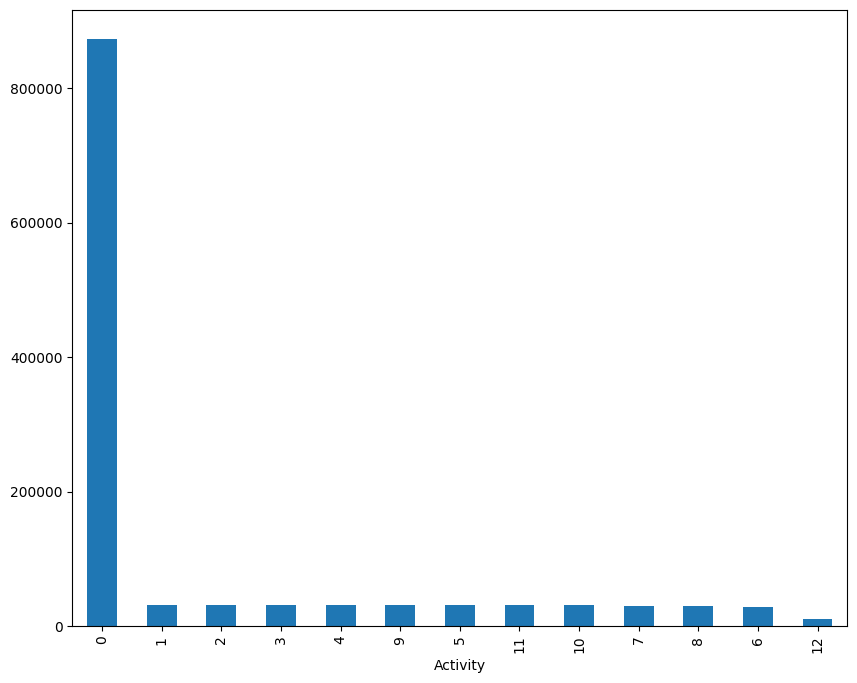

In [34]:
# Shows how many times each activity occurs in the Dataset
plt.figure(figsize=(10,8))
df['Activity'].value_counts().plot.bar()

<Axes: xlabel='Activity'>

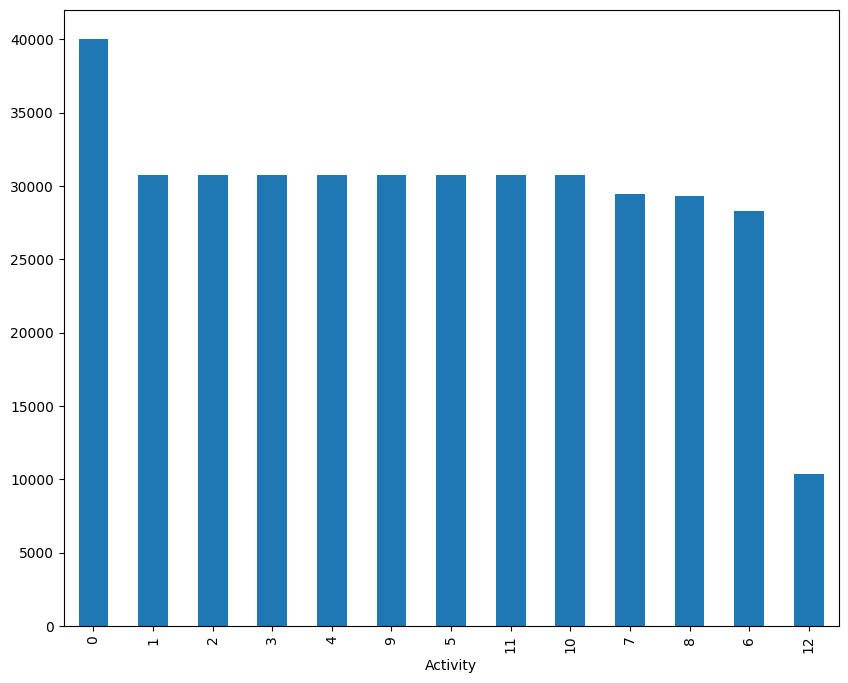

In [35]:
# Differentaiting Activty by 0 and Other Value
data_activity_0 = df[df["Activity"] == 0]
data_activity_else = df[df["Activity"] != 0]

# This randomly picks exactly 40,000 rows from data_activity_0
data_activity_0 = data_activity_0.sample(n=40000)
df = pd.concat([data_activity_0,data_activity_else])

plt.figure(figsize=(10,8))
df['Activity'].value_counts().plot.bar()

In [36]:
# EDA (Exploratory Data Analysis)
# It is used to understanding data by spotting problem and finding patterns

activity_label ={
    0: "None",
    1: "Standing still (1 min)",
    2: "Sitting and relaxing (1 min)",
    3: "Lying down (1 min)",
    4: "Walking (1 min)",
    5: "Climbing stairs (1 min)",
    6: "Waist bends forward (20x)",
    7: "Frontal elevation of arms (20x)",
    8: "Knees bending (crouching) (20x)",
    9: "Cycling (1 min)",
    10: "Jogging (1 min)",
    11: "Running (1 min)",
    12: "Jump front & back (20x)",
}


===Standing still (1 min) - a===


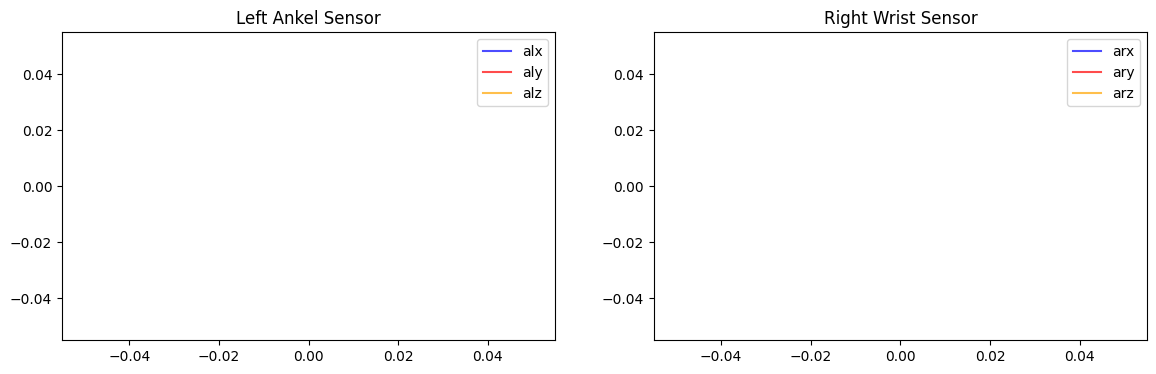

===Standing still (1 min) - g===


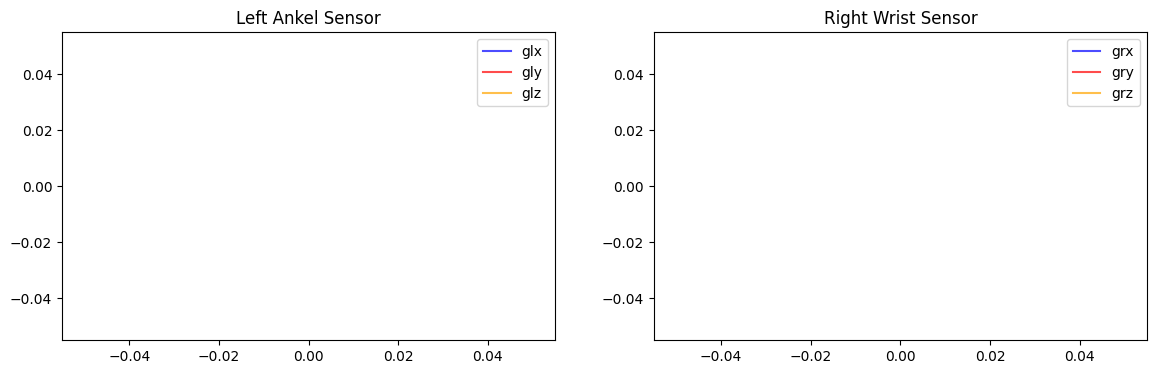

===Sitting and relaxing (1 min) - a===


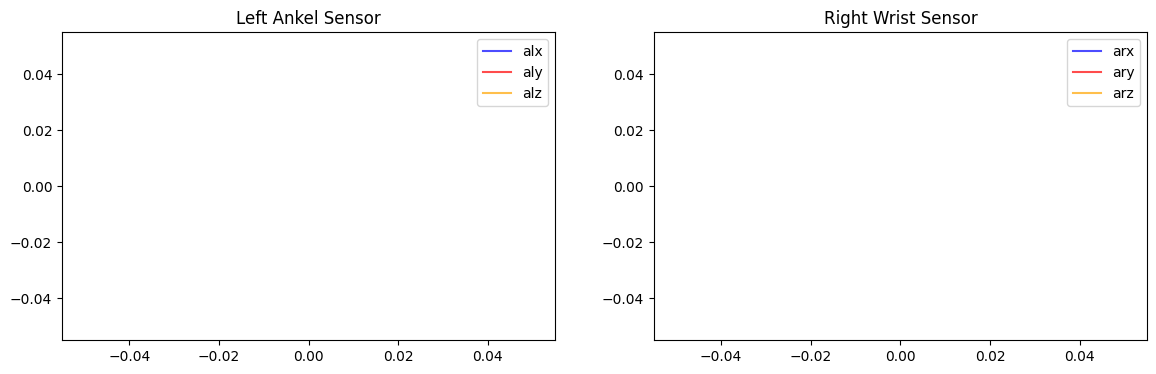

===Sitting and relaxing (1 min) - g===


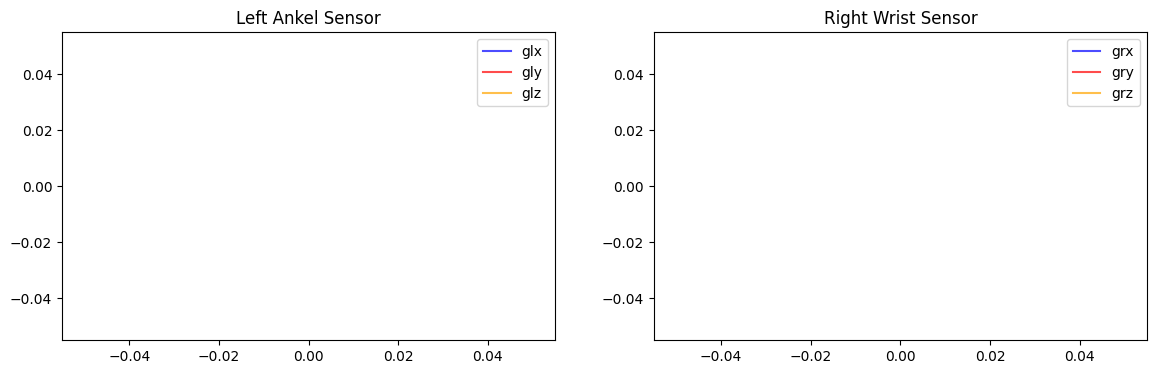

===Lying down (1 min) - a===


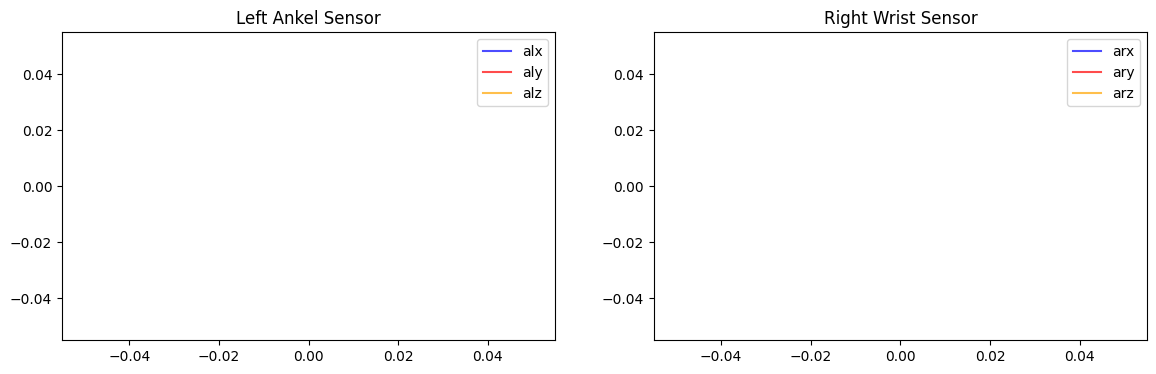

===Lying down (1 min) - g===


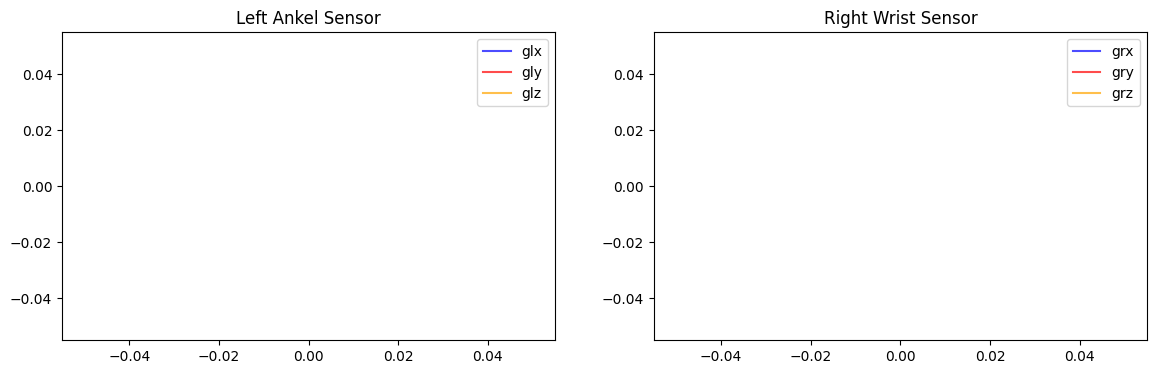

===Walking (1 min) - a===


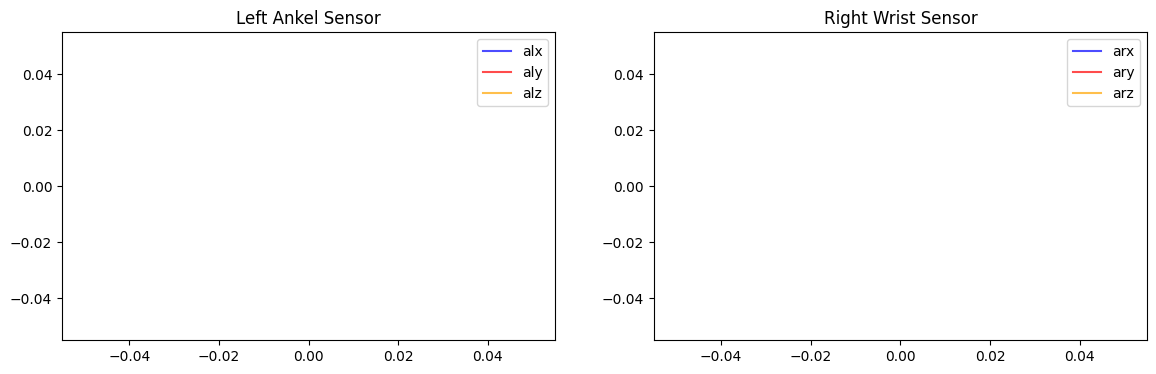

===Walking (1 min) - g===


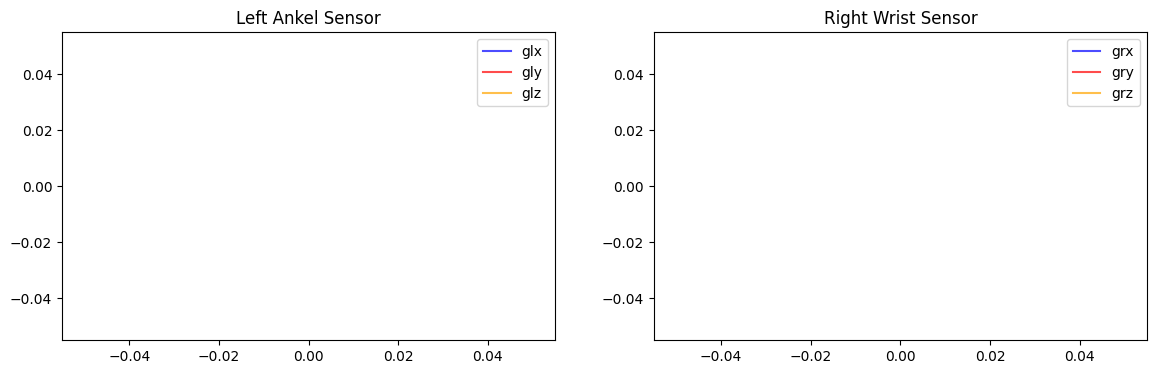

===Climbing stairs (1 min) - a===


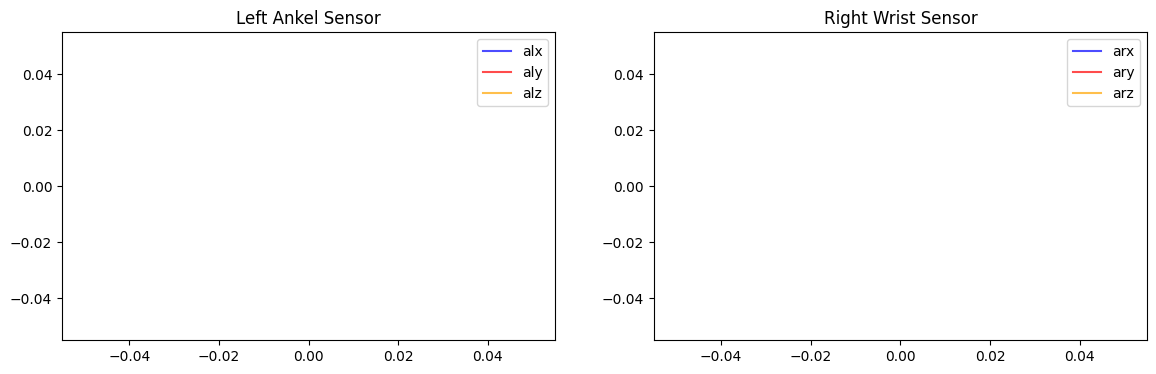

===Climbing stairs (1 min) - g===


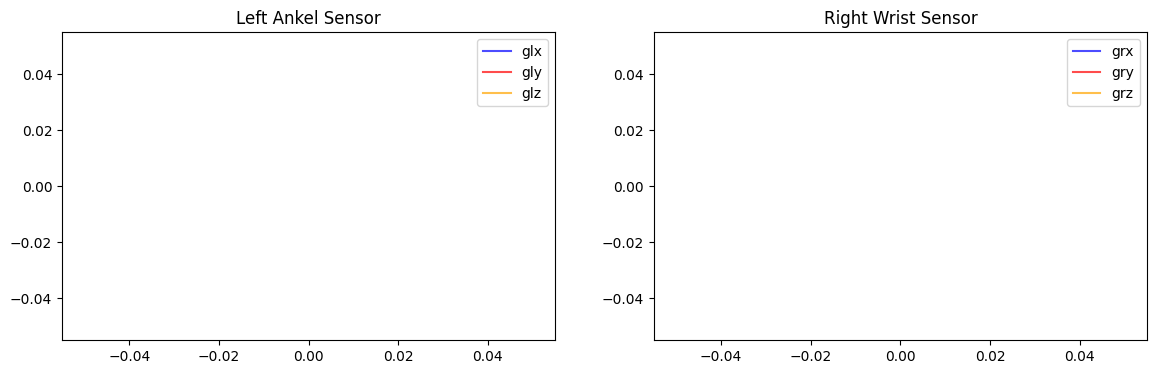

===Waist bends forward (20x) - a===


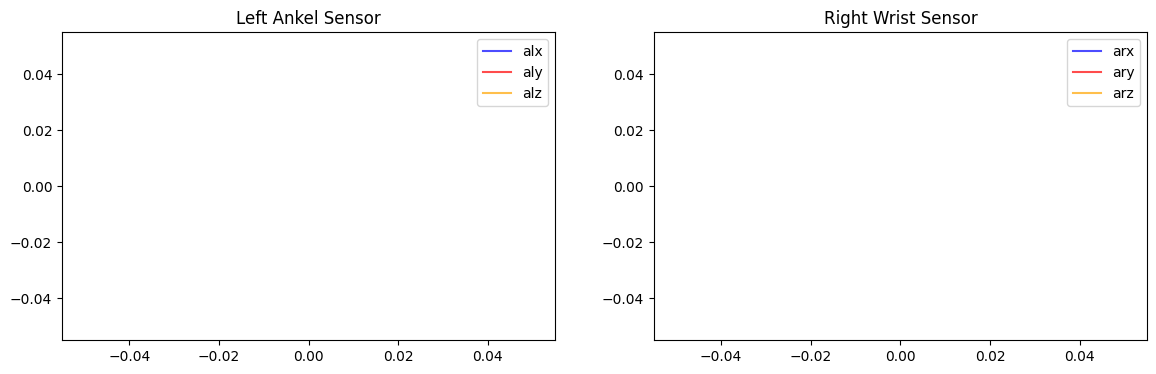

===Waist bends forward (20x) - g===


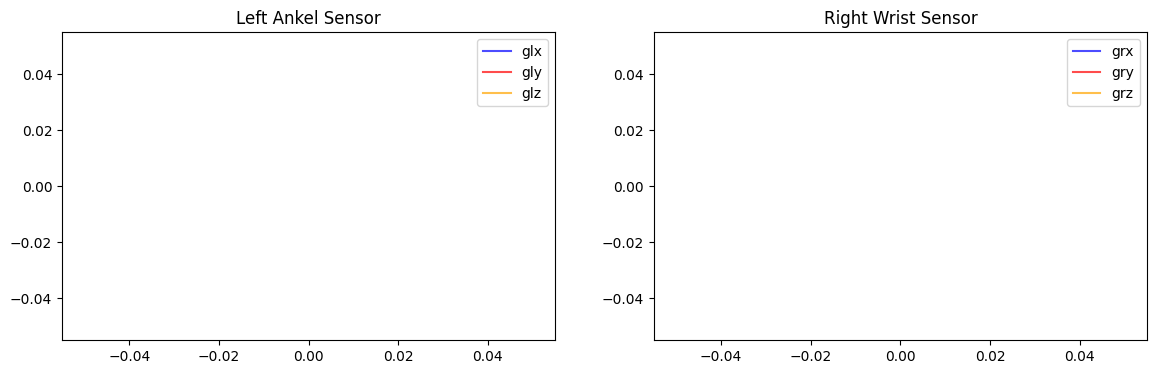

===Frontal elevation of arms (20x) - a===


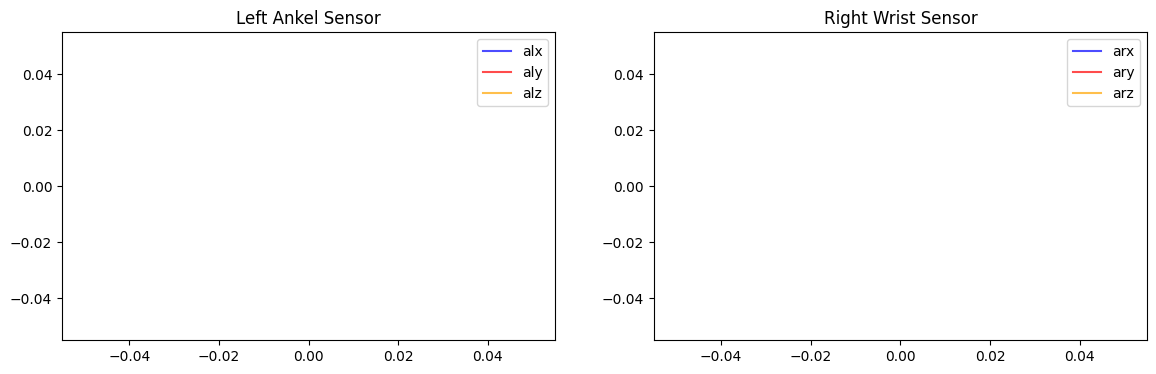

===Frontal elevation of arms (20x) - g===


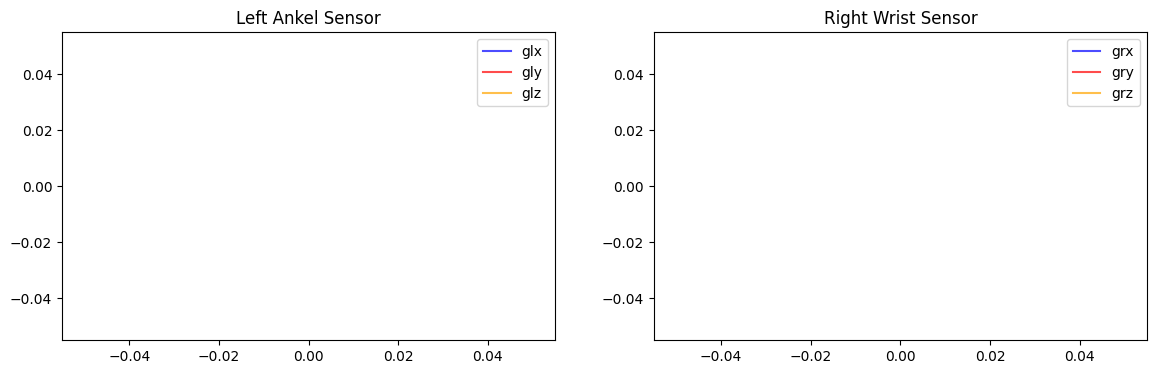

===Knees bending (crouching) (20x) - a===


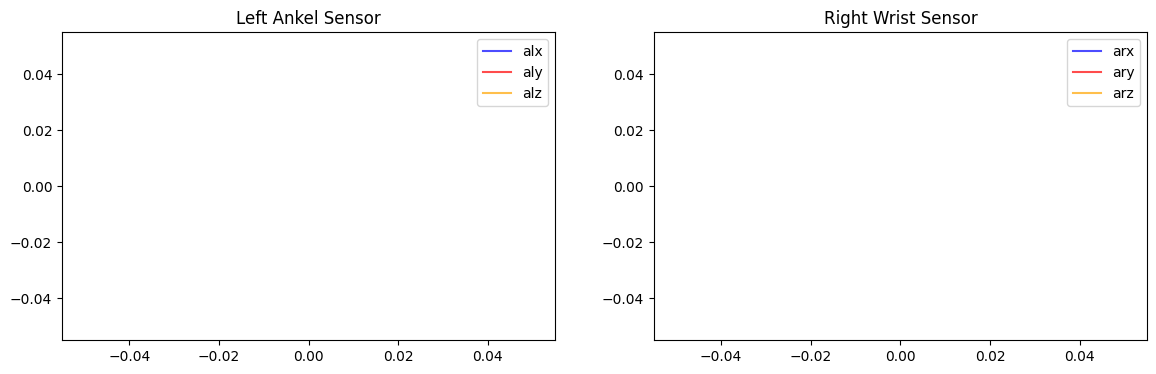

===Knees bending (crouching) (20x) - g===


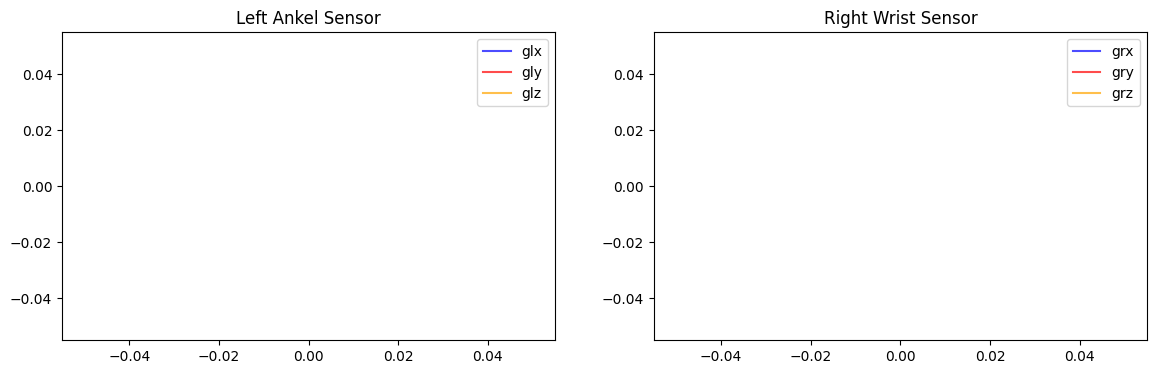

===Cycling (1 min) - a===


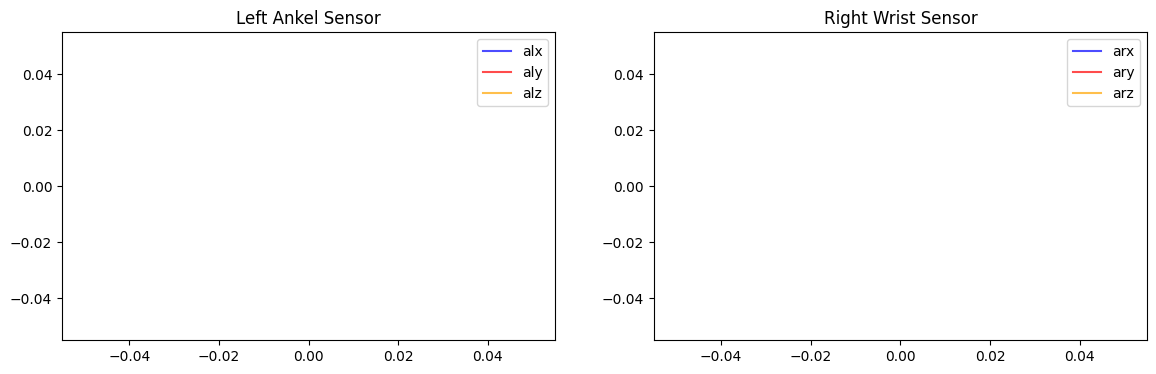

===Cycling (1 min) - g===


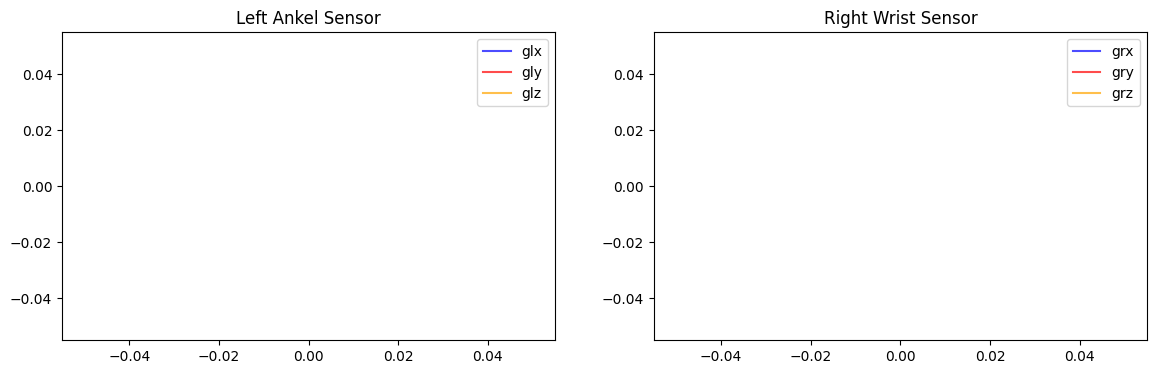

===Jogging (1 min) - a===


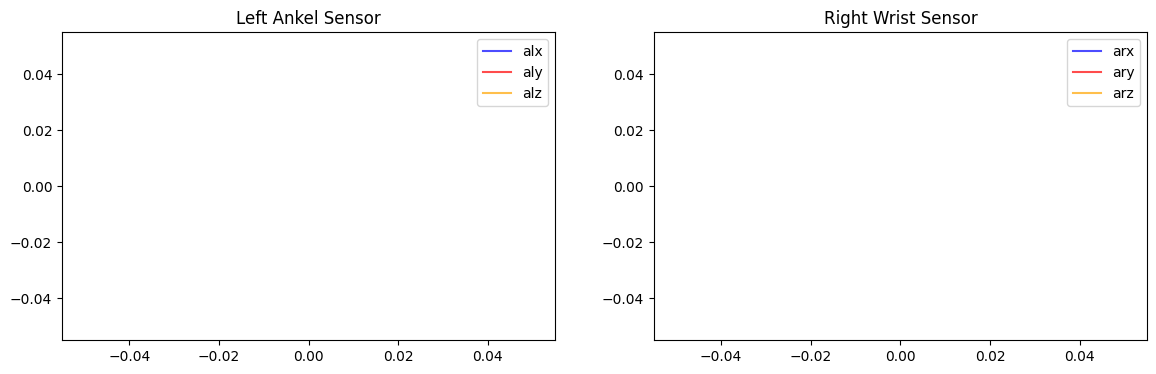

===Jogging (1 min) - g===


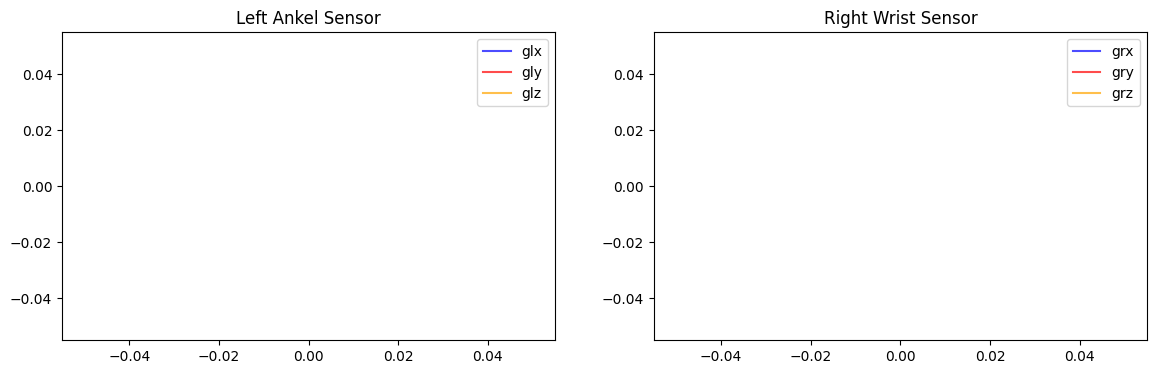

===Running (1 min) - a===


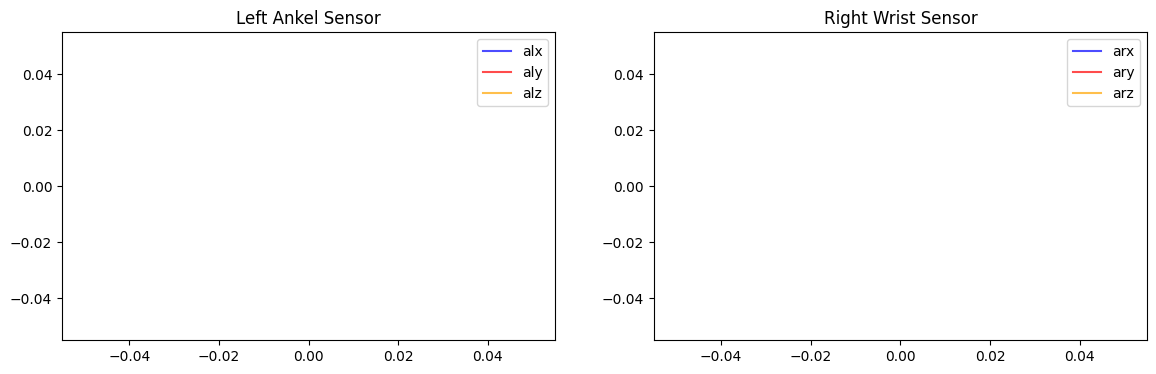

===Running (1 min) - g===


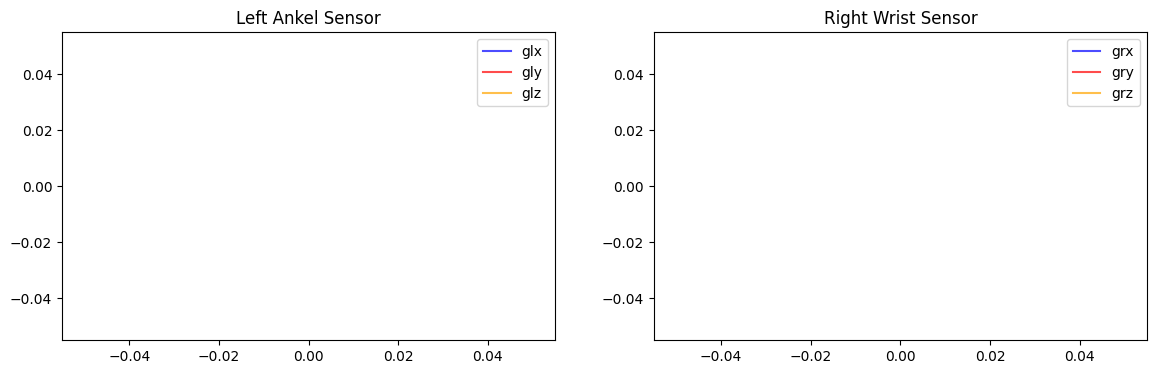

===Jump front & back (20x) - a===


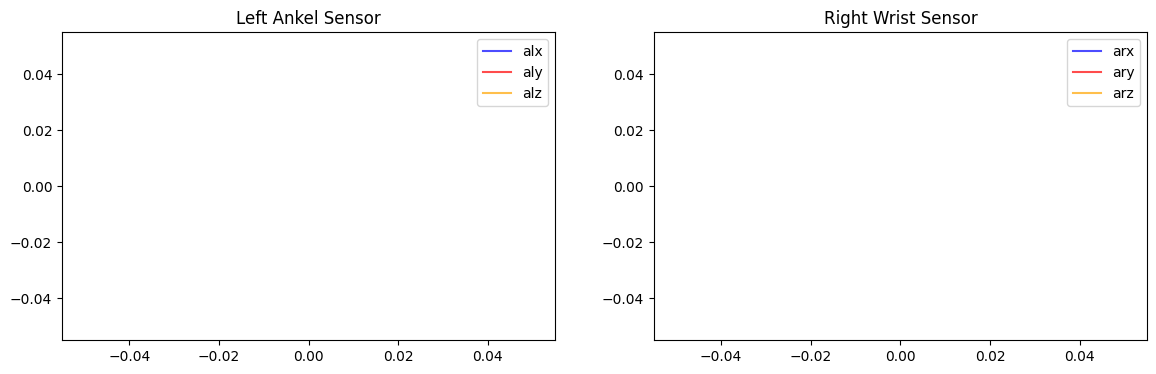

===Jump front & back (20x) - g===


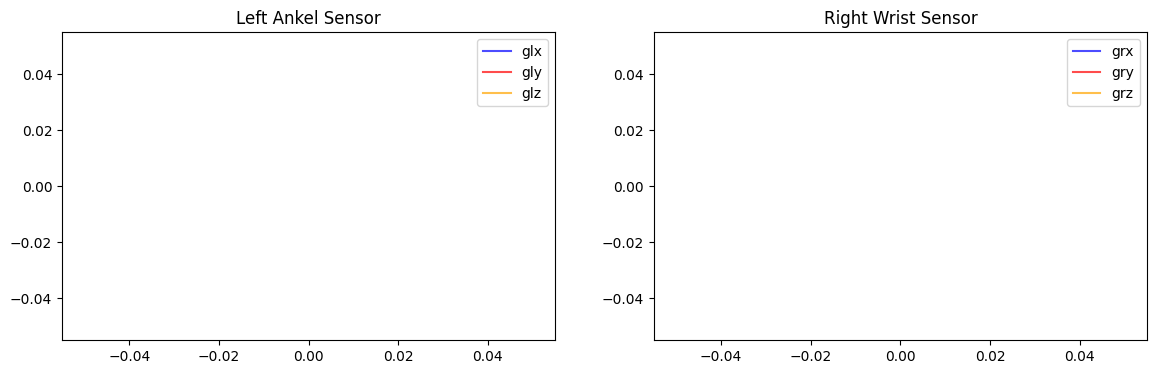

In [37]:
# df has Sensor Data for Human Activities and we are filtering it to only one specific person
subject1 = df[df['subject'] == 1]
# 'a' -> Accelerometer Reading , 'g' -> Gyroscope Reading
readings = ['a','g']
# glx -> gyroscope sensor for left ankle sensor from x-axis reading

# For each activity, showing both accelerometer and gyroscope readings from the left ankle and right wrist sensors
for i in range(1,13):
  for r in readings:
    print(f"==={activity_label[i]} - {r}===")
    plt.figure(figsize=(14,4))

    plt.subplot(1,2,1)

    plt.plot(subject1[subject1["Activity"] == i].reset_index(drop=True)[r+"lx"],
             color="blue",alpha = 0.7 , label = r+"lx")
    plt.plot(subject1[subject1["Activity"] == i].reset_index(drop=True)[r+"ly"],
             color="red",alpha = 0.7 , label = r+"ly")
    plt.plot(subject1[subject1["Activity"] == i].reset_index(drop=True)[r+"lz"],
             color="orange",alpha = 0.7 , label = r+"lz")

    plt.title("Left Ankel Sensor")
    plt.legend()


    plt.subplot(1,2,2)

    plt.plot(subject1[subject1["Activity"] == i].reset_index(drop=True)[r+"rx"],
             color="blue",alpha = 0.7 , label = r+"rx")
    plt.plot(subject1[subject1["Activity"] == i].reset_index(drop=True)[r+"ry"],
             color="red",alpha = 0.7 , label = r+"ry")
    plt.plot(subject1[subject1["Activity"] == i].reset_index(drop=True)[r+"rz"],
             color="orange",alpha = 0.7 , label = r+"rz")

    plt.title("Right Wrist Sensor")
    plt.legend()
    plt.show()

===Standing still (1 min) - a===


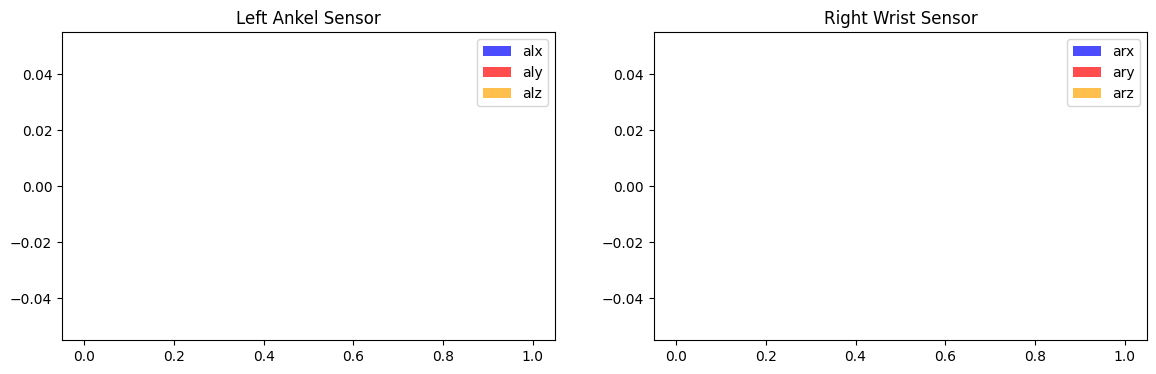

===Standing still (1 min) - g===


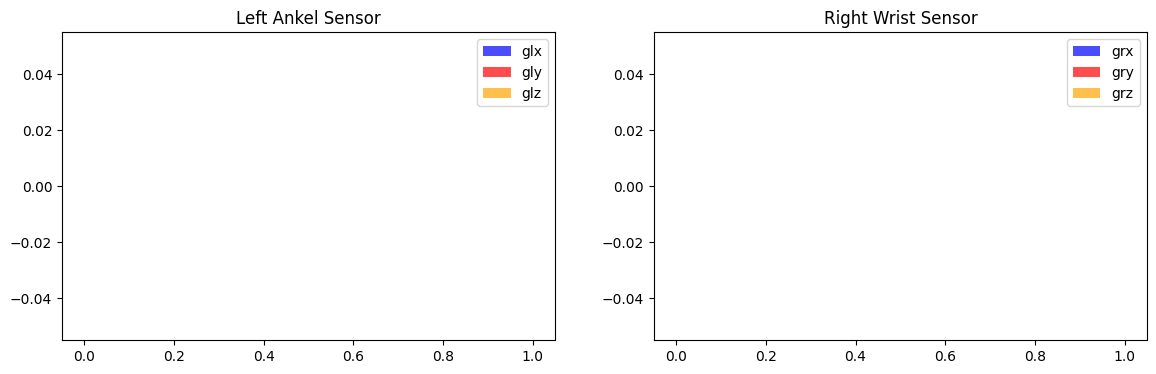

===Sitting and relaxing (1 min) - a===


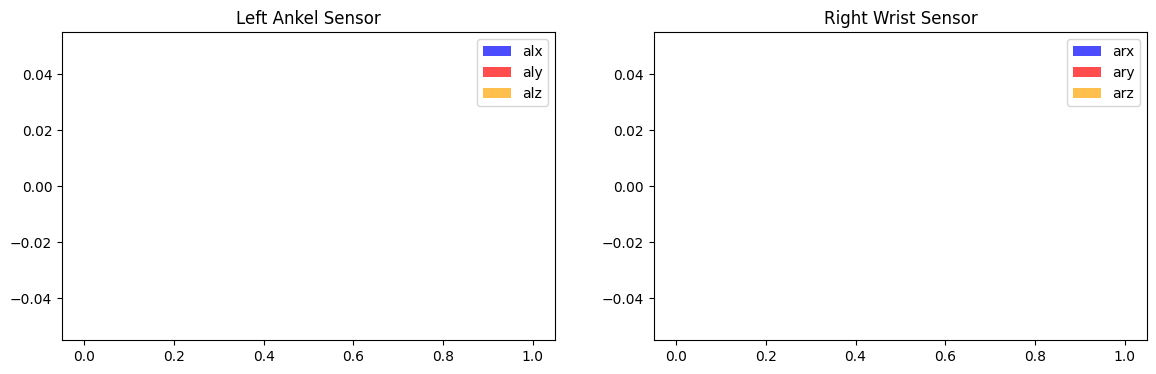

===Sitting and relaxing (1 min) - g===


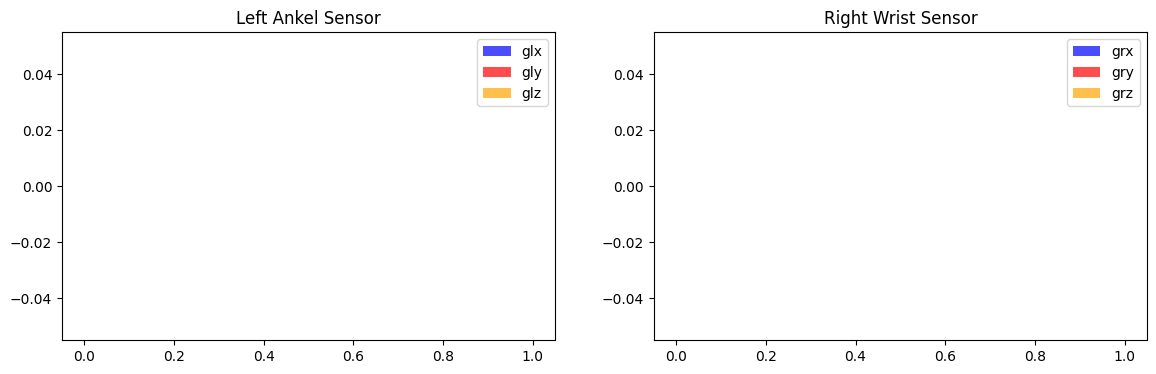

===Lying down (1 min) - a===


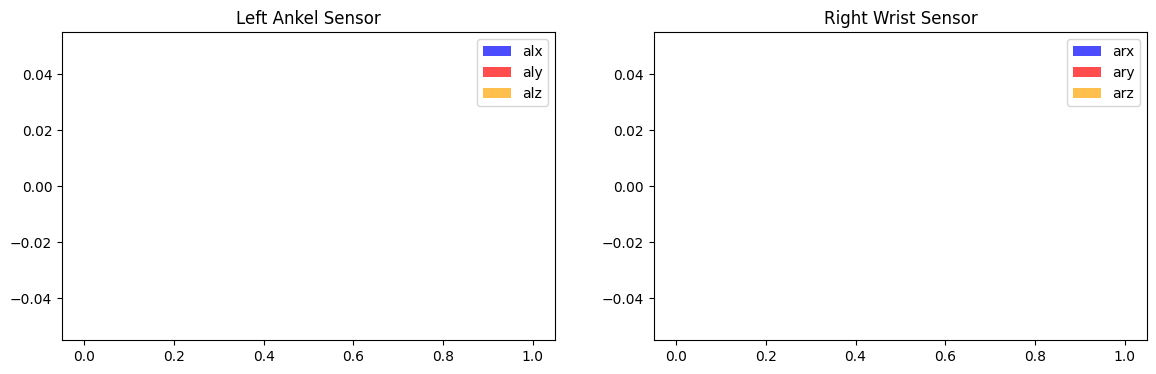

===Lying down (1 min) - g===


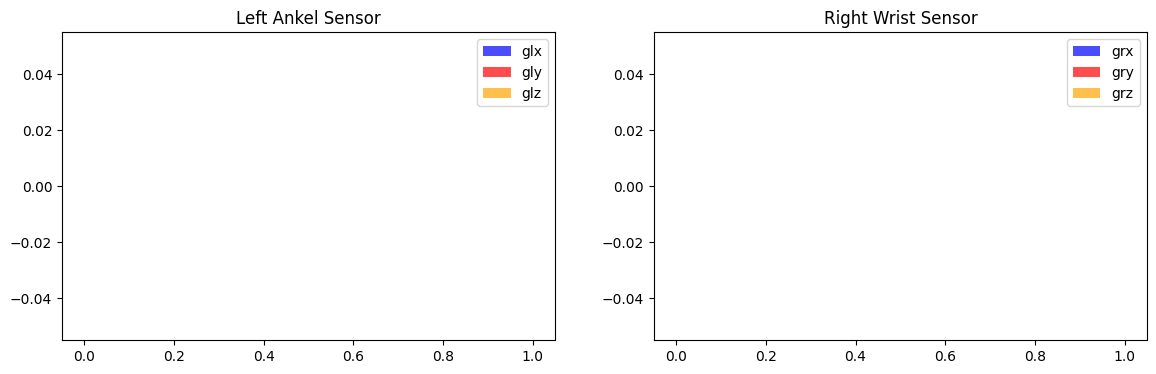

===Walking (1 min) - a===


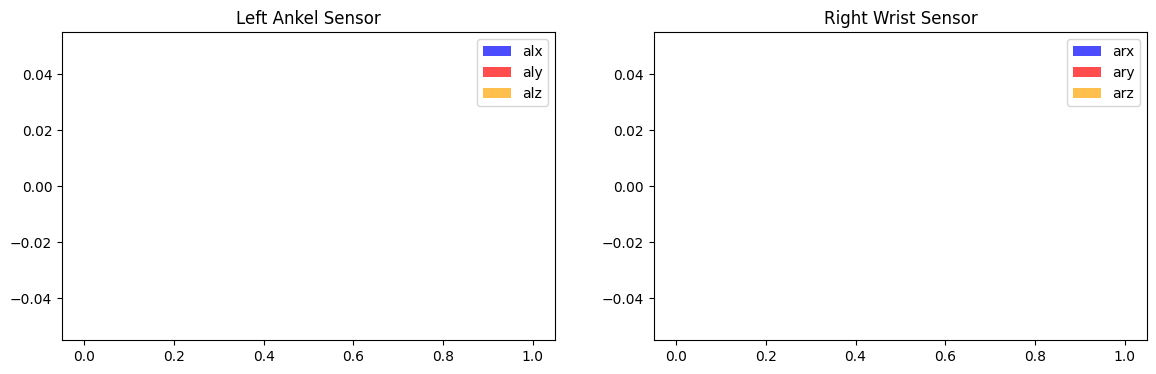

===Walking (1 min) - g===


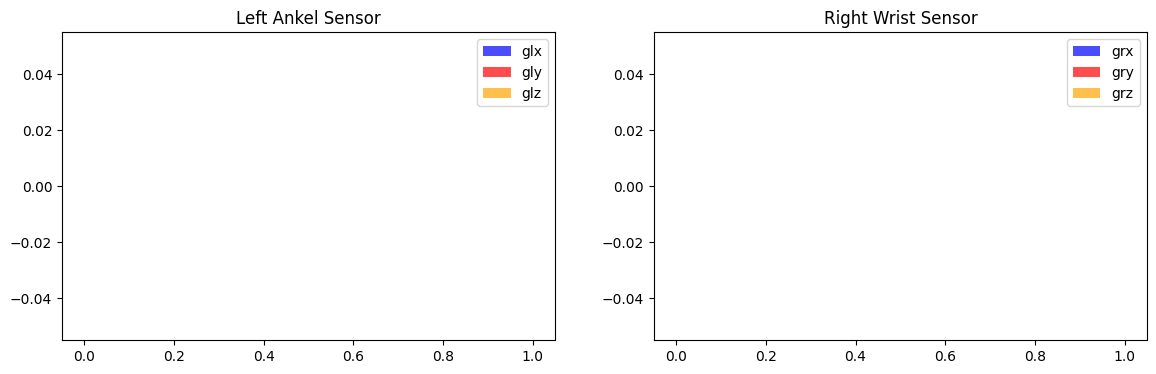

===Climbing stairs (1 min) - a===


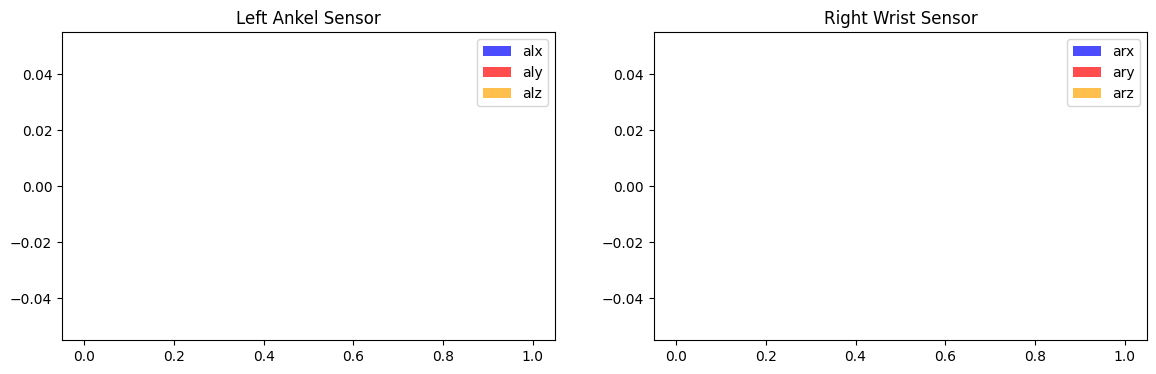

===Climbing stairs (1 min) - g===


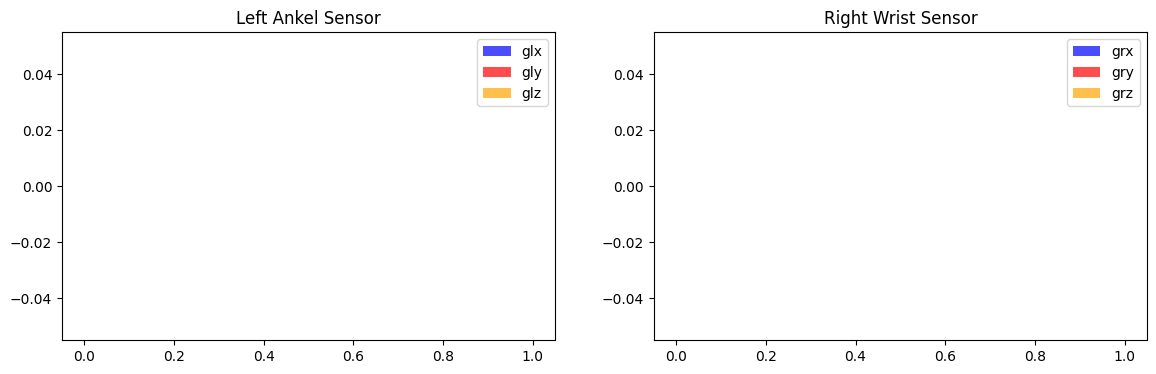

===Waist bends forward (20x) - a===


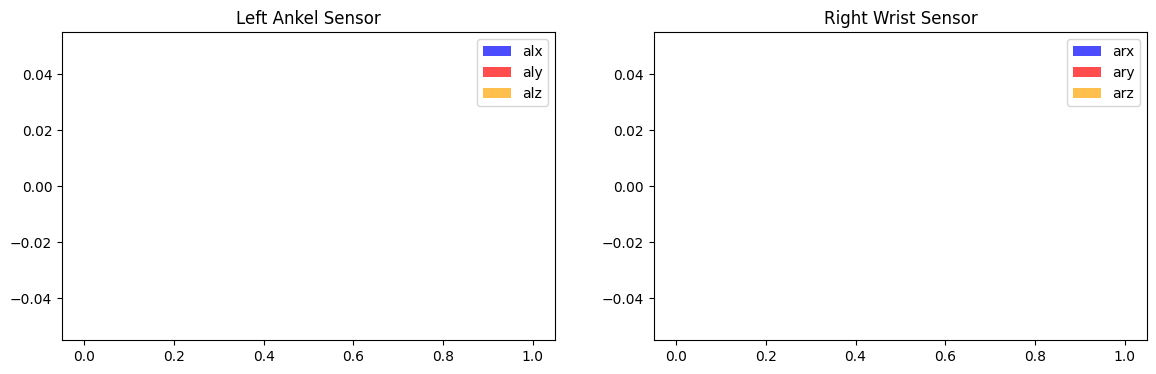

===Waist bends forward (20x) - g===


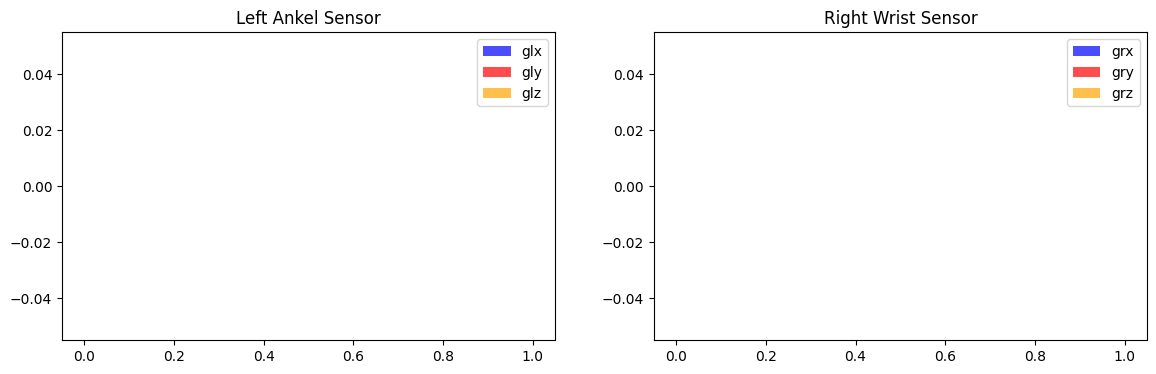

===Frontal elevation of arms (20x) - a===


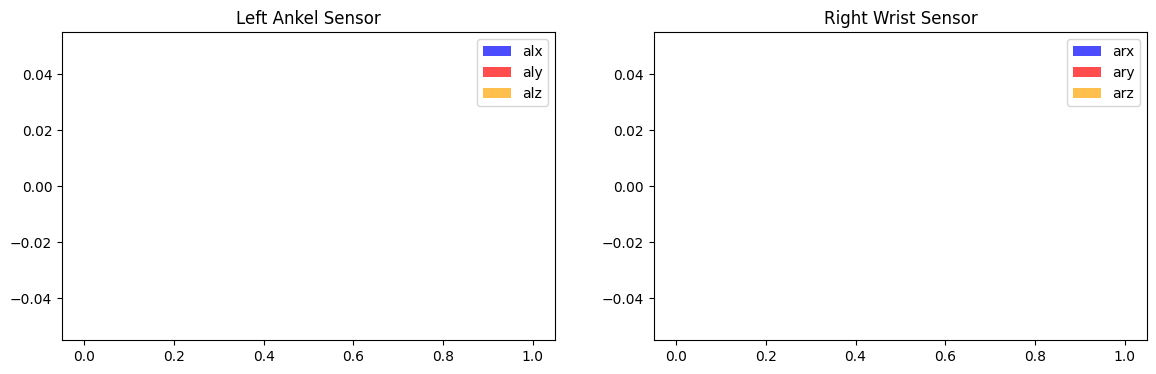

===Frontal elevation of arms (20x) - g===


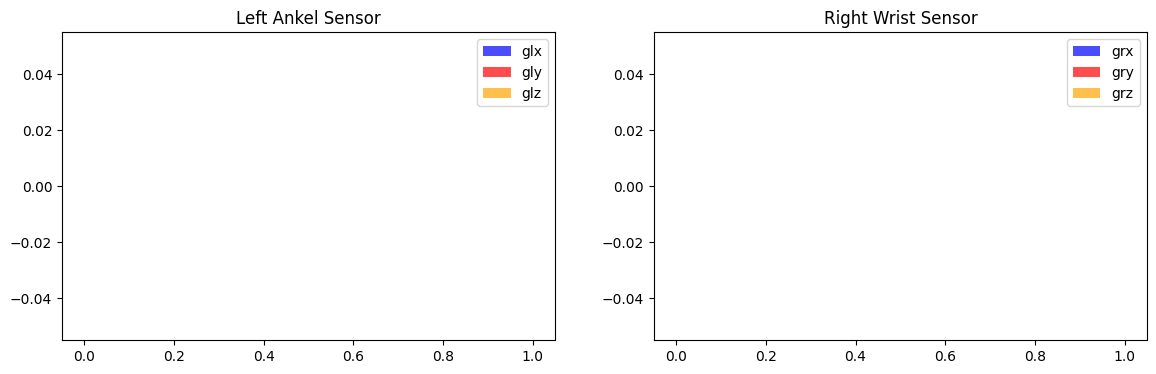

===Knees bending (crouching) (20x) - a===


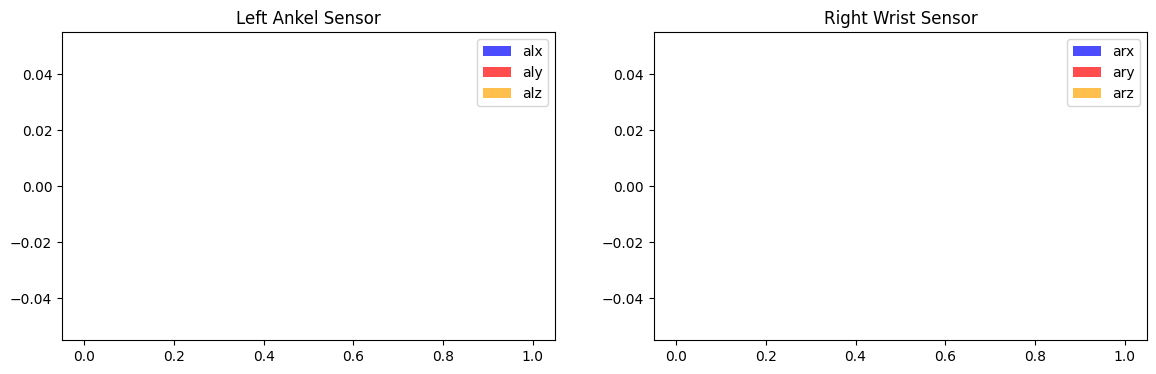

===Knees bending (crouching) (20x) - g===


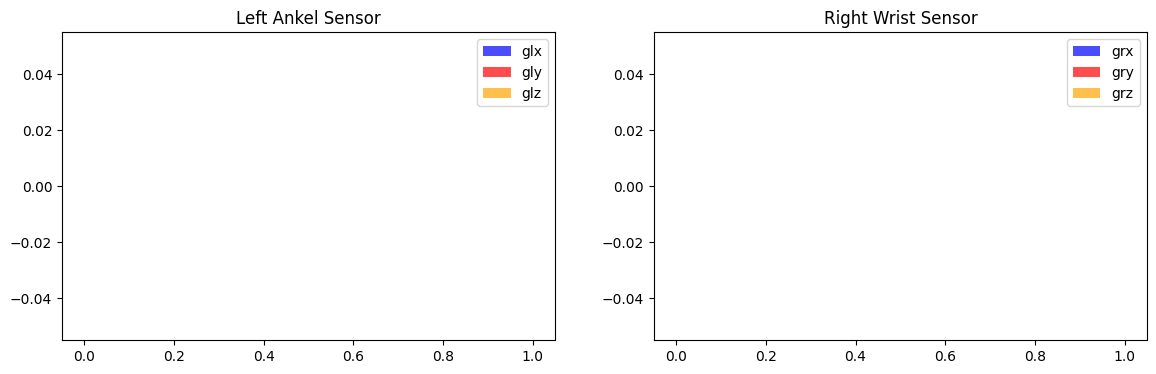

===Cycling (1 min) - a===


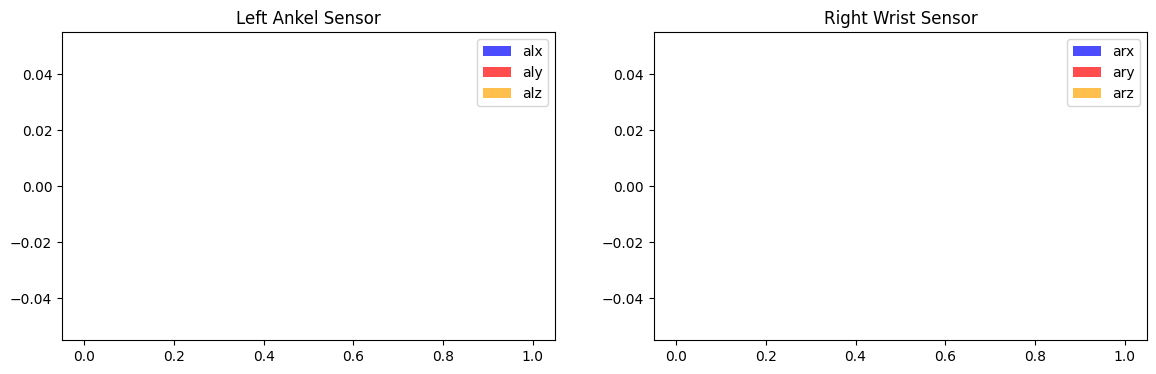

===Cycling (1 min) - g===


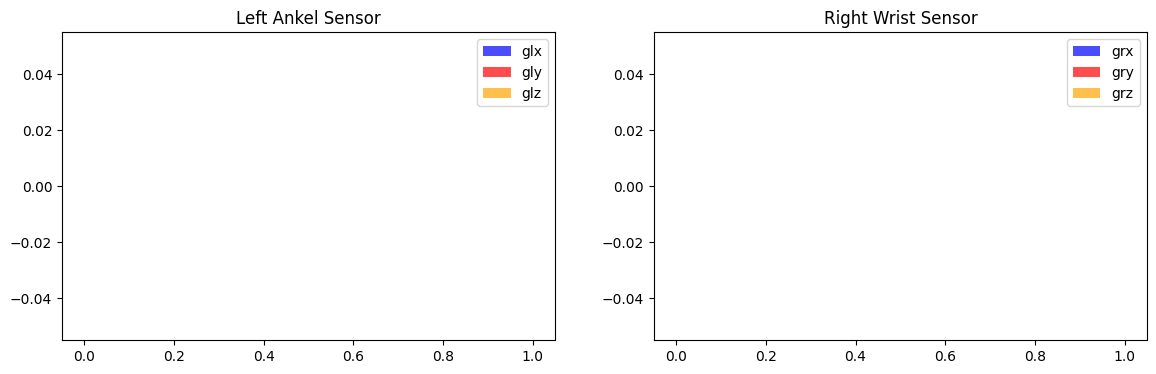

===Jogging (1 min) - a===


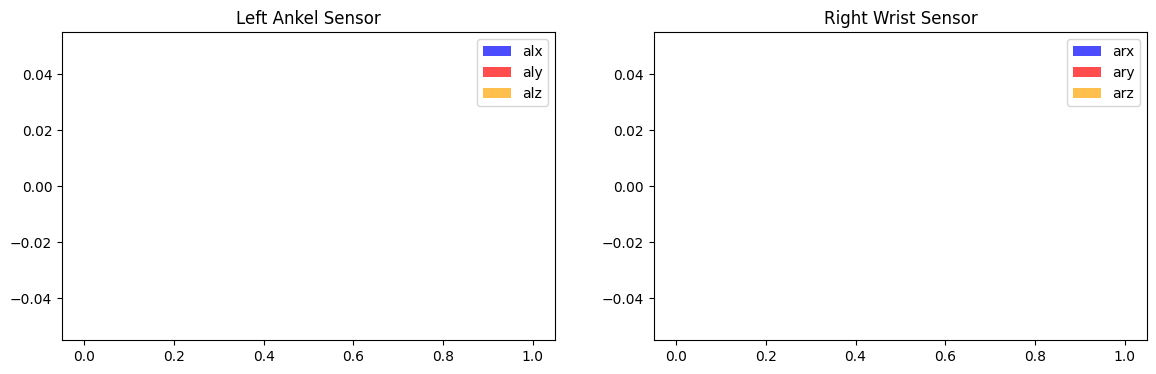

===Jogging (1 min) - g===


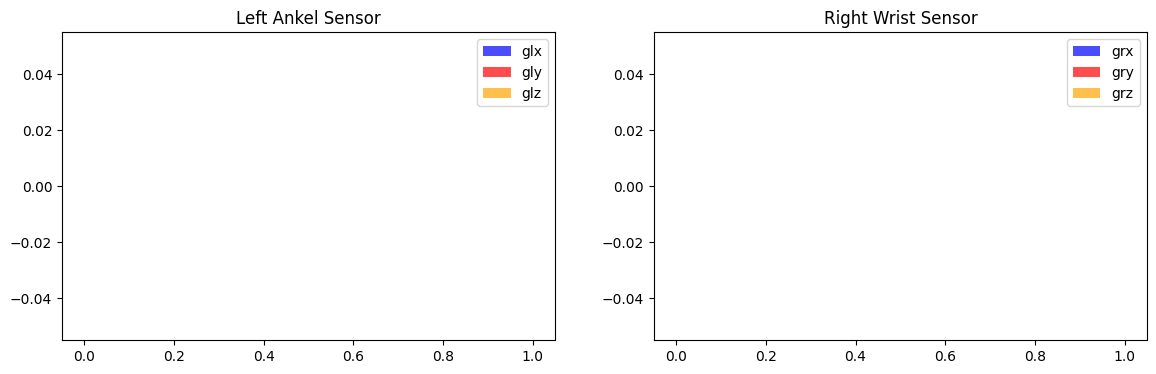

===Running (1 min) - a===


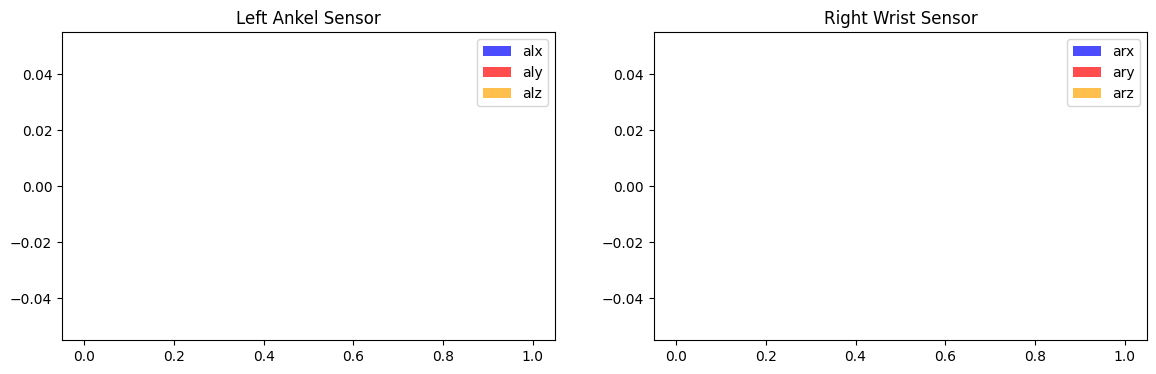

===Running (1 min) - g===


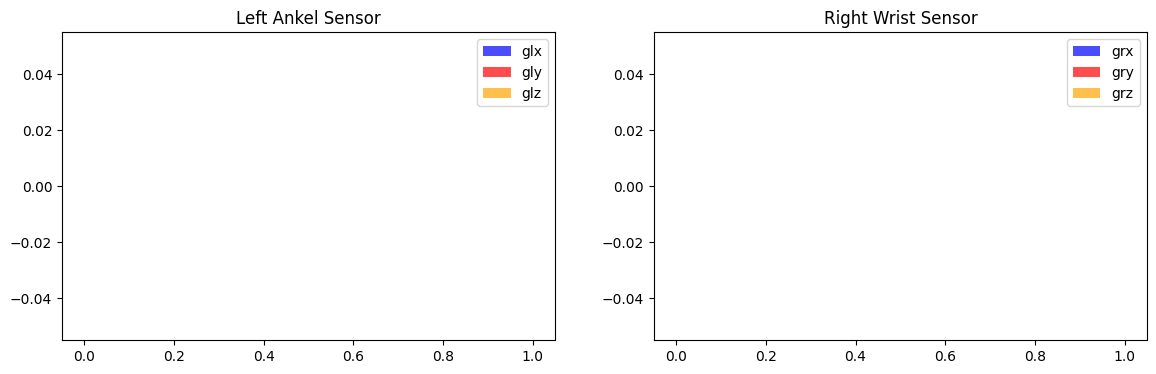

===Jump front & back (20x) - a===


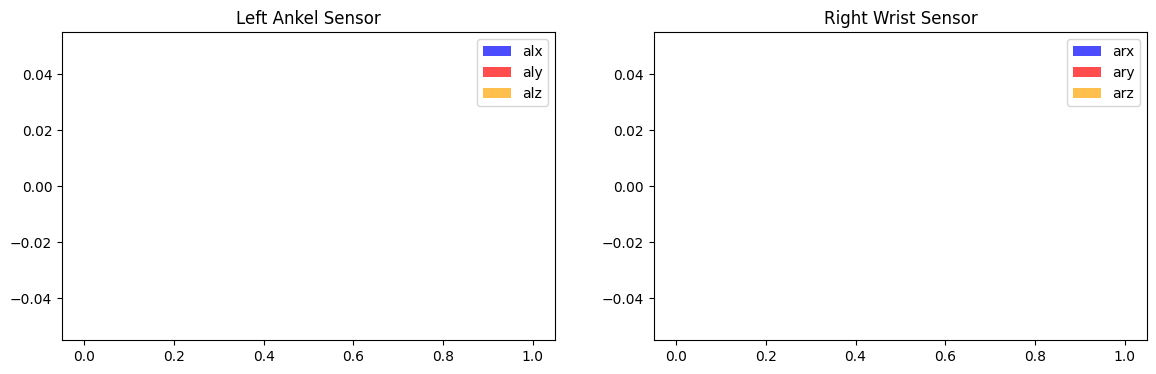

===Jump front & back (20x) - g===


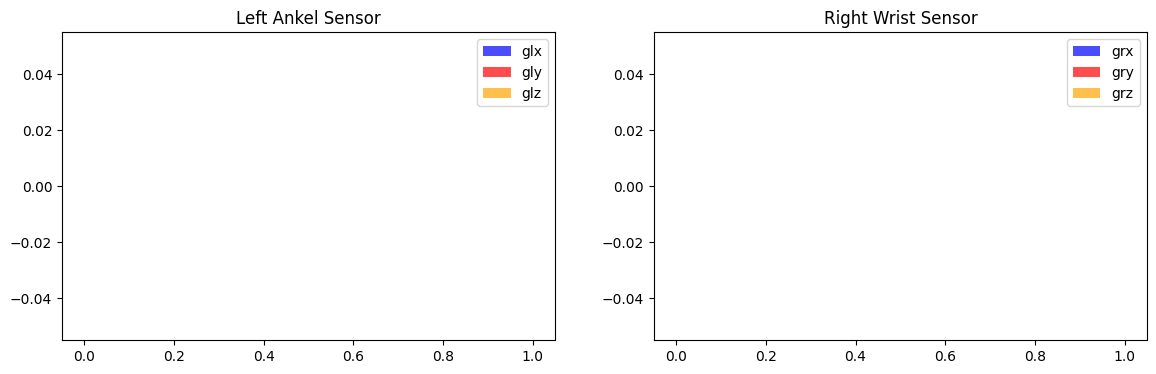

In [38]:
for i in range(1,13):
  for r in readings:
    print(f"==={activity_label[i]} - {r}===")
    plt.figure(figsize=(14,4))

    plt.subplot(1,2,1)

    # Plotting Histogram (plt.hist)
    plt.hist(subject1[subject1["Activity"] == i].reset_index(drop=True)[r+"lx"],
             color='blue',alpha = 0.7 , label = r+"lx")
    plt.hist(subject1[subject1["Activity"] == i].reset_index(drop=True)[r+"ly"],
             color="red",alpha = 0.7 , label = r+"ly")
    plt.hist(subject1[subject1["Activity"] == i].reset_index(drop=True)[r+"lz"],
             color="orange",alpha = 0.7 , label = r+"lz")

    plt.title("Left Ankel Sensor")
    plt.legend()


    plt.subplot(1,2,2)

    plt.hist(subject1[subject1["Activity"] == i].reset_index(drop=True)[r+"rx"],
             color="blue",alpha = 0.7 , label = r+"rx")
    plt.hist(subject1[subject1["Activity"] == i].reset_index(drop=True)[r+"ry"],
             color="red",alpha = 0.7 , label = r+"ry")
    plt.hist(subject1[subject1["Activity"] == i].reset_index(drop=True)[r+"rz"],
             color="orange",alpha = 0.7 , label = r+"rz")

    plt.title("Right Wrist Sensor")
    plt.legend()
    plt.show()

In [39]:
df['Activity'] = df['Activity'].replace(
    [0,1,2,3,4,5,6,7,8,9,10,11,12],
    [
        'None',
        'Standing still (1 min)',
        'Sitting and relaxing (1 min)',
        'Lying down (1 min)',
        'Walking (1 min)',
        'Climbing stairs (1 min)',
        'Waist bends forward (20x)',
        'Frontal elevation of arms (20x)',
        'Knees bending (crouching) (20x)',
        'Cycling (1 min)',
        'Jogging (1 min)',
        'Running (1 min)',
        'Jump front & back (20x)'
    ]
)


In [40]:
# Only Activities present in both dataset and activities list will be displayed
df['Activity']

,Activity
69278,None
1062365,None
1081392,None
217102,None
583728,None
...,...
1213641,Jump front & back (20x)
1213642,Jump front & back (20x)
1213643,Jump front & back (20x)
1213644,Jump front & back (20x)


In [41]:
df.Activity.value_counts()

,count
Activity,
None,40000
Standing still (1 min),30720
Sitting and relaxing (1 min),30720
Lying down (1 min),30720
Walking (1 min),30720
Cycling (1 min),30720
Climbing stairs (1 min),30720
Running (1 min),30720
Jogging (1 min),30720


<Axes: ylabel='count'>

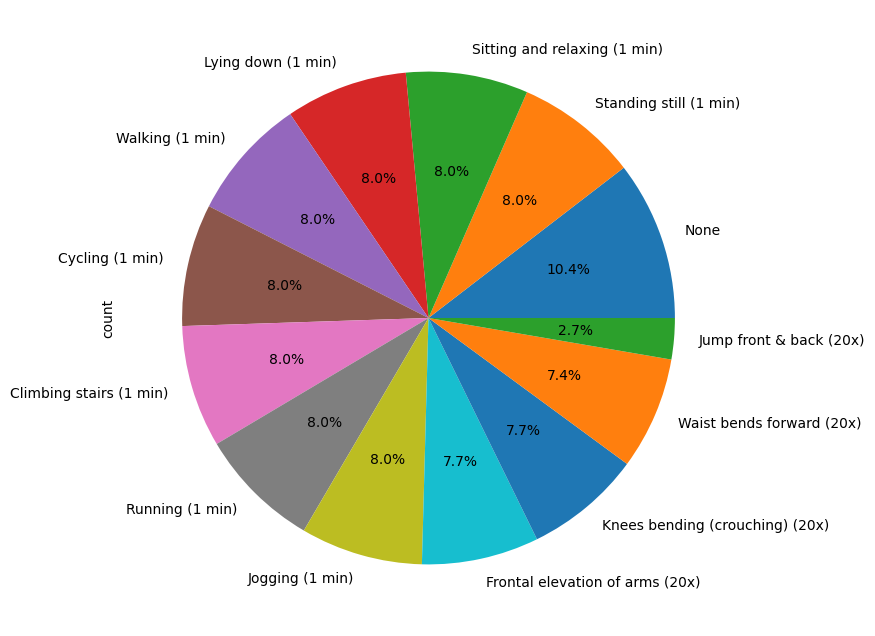

In [42]:
#PIE Chart representation for Activities

# .value_counts() -> Counts how many times each activity appears
# autopct='%1.1f%%' → shows the percentage on each slice with 1 decimal place

plt.figure(figsize=(12,8))
df['Activity'].value_counts().plot.pie(autopct='%1.1f%%')

In [43]:
df1 = df.copy()

# columns[:-2] -> Skips last two column which are Non-Numeric
for feature in df1.columns[:-2]:
  lower_range = np.quantile(df[feature],0.01)
  upper_range = np.quantile(df[feature],0.99)
  print(feature,'range:',lower_range,'to',upper_range)

  # Finding the range of “normal” values for each column (between the 1% and 99% points).
  # Removing rows that have values outside that range (outliers).

  df1 = df1.drop(df1[(df1[feature] < lower_range) | (df1[feature] > upper_range)].index , axis =0 )
  print('shape',df1.shape)

alx range: -11.49742 to 19.213
shape (375538, 14)
aly range: -19.378 to 2.3827119999999993
shape (369648, 14)
alz range: -18.949 to 14.129
shape (365837, 14)
glx range: -0.75325 to 0.80891
shape (358848, 14)
gly range: -1.0694 to 0.9644627999999956
shape (352047, 14)
glz range: -1.1061 to 0.8290799999999999
shape (346376, 14)
arx range: -21.487 to 9.040483999999985
shape (341156, 14)
ary range: -18.691 to 11.828059999999997
shape (334949, 14)
arz range: -10.251059999999999 to 11.775
shape (332284, 14)
grx range: -1.0216 to 0.95294
shape (328618, 14)
gry range: -1.1437 to 0.9117
shape (323635, 14)
grz range: -0.7069 to 1.125
shape (318927, 14)


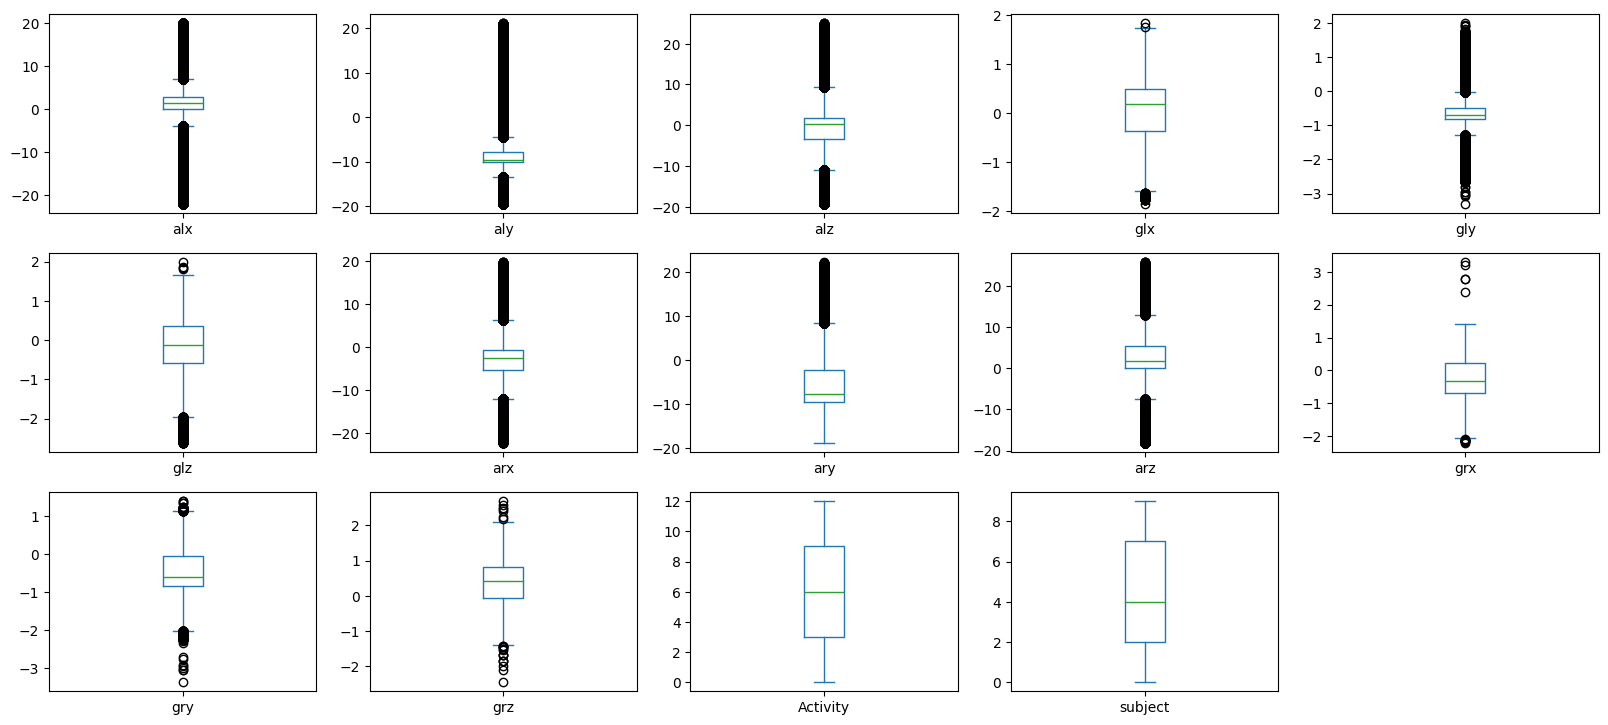

In [44]:
# DATA PREPROCESSING --->

# Using Label Encoder
le = LabelEncoder()
df['Activity'] = le.fit_transform(df['Activity'])
df['subject'] = le.fit_transform(df['subject'])

# Creating boxplots for each column separately and changes our text data into numbers
# Helps visualise patterns, differences, and unusual data points (outliers) that might cause problems later
df.plot(kind='box', subplots=True, layout=(5,5), figsize=(20,15))
plt.show()

# Black Line of Box would signify median

In [45]:
X = df.drop(['Activity','subject'],axis = 1).values
y = df['Activity'].values

#1.) Training Dataset: Used to train your machine learning model by analysing pattern, relationship and rules from data
# 2.) Testing Dataset: Used to evaluate how well your model performs on unseen data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Performing Scaling using Robust Scaler

# scaling with RobustScaler means it’s adjusting our data so all features are on a similar scale,
# but does not mess up with extreme values (outliers) [ignored big differences in values]
# Data would be transformed such that Median = 0
ro_scaler = RobustScaler()
X_train_scaled = ro_scaler.fit_transform(X_train)
X_test_scaled = ro_scaler.transform(X_test)

In [46]:
# BUILDING MODEL --->

# Confusion Matrix : It is just a table that shows how many times your model was right and
#                     how many times it was wrong, and also what kind of mistakes it made.
# 'cm' is True by default

#Creating Function to Summarize Results
def resultsSummarizer(y_true,y_pred, cm_enable = True):
  cm = confusion_matrix(y_true,y_pred)

  acc = accuracy_score(y_true,y_pred)
  prec = precision_score(y_true,y_pred,average='macro')
  rec=sensitivity = recall_score(y_true,y_pred,average='macro')
  # F1 Score is a single metric that combines Precision and Recall to give a balanced measure of a model’s accuracy
  f1 = f1_score(y_true,y_pred,average='macro')

  if cm_enable:
      plt.figure(figsize=(15,15))
      sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=list(activity_label.values()),
                yticklabels=list(activity_label.values()))
      plt.title('Confusion Matrix')
      plt.xlabel('Predicted Label')
      plt.ylabel('True Label')
      plt.show()

  # print(classification_report(y_true,y_pred))
  print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
  print(f'Precision Score: ' + '{:.4%}'.format(prec))
  print(f'Recall Score: ' + '{:.4%}'.format(rec))
  print(f'F1 Score: ' + '{:.4%}'.format(f1))

In [47]:
# 1.) Model -> LOGISTIC REGRESSION

lr = LogisticRegression()
lr.fit(X_train,y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
lr.score(X_train,y_train)

0.5472901501760636

In [49]:
# Checking for Scale Data
lr2 = LogisticRegression()

# Checking X train scaled compared to y train
lr2.fit(X_train_scaled,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
# Checking for Train and Test Dataset (Robust Scaling)

lr2.score(X_train_scaled,y_train)

0.5525337861348105

In [51]:
# Performance is better for Test Dataset
lr2.score(X_test_scaled,y_test)

0.5543377279512313

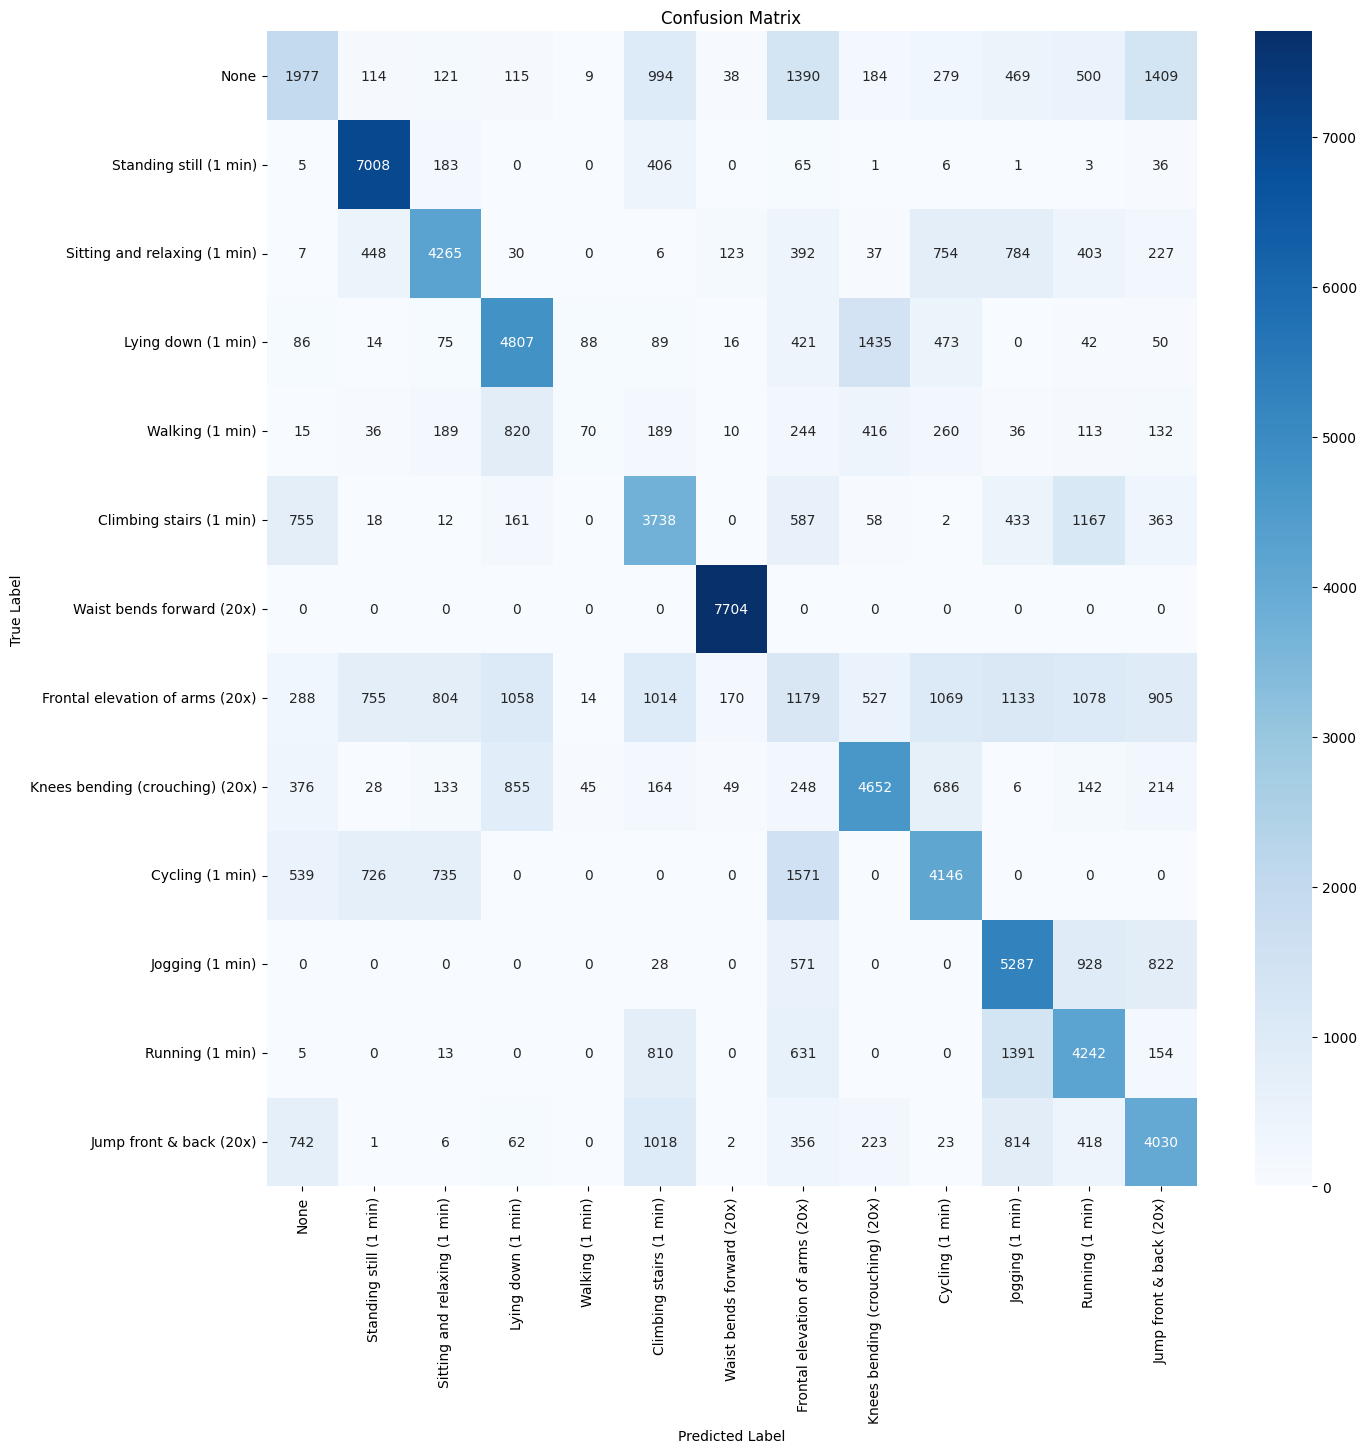

Accuracy Score: 55.4338%
Precision Score: 53.1815%
Recall Score: 53.7010%
F1 Score: 52.1278%


In [52]:
# Good Model -> Diagonal Elements Cell should be darker than Non-Diagonal Cell
y_pred_lr = lr2.predict(X_test_scaled)
resultsSummarizer(y_test,y_pred_lr)

In [53]:
# 2.) Model -> KNN

knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train,y_train)

KNeighborsClassifier()

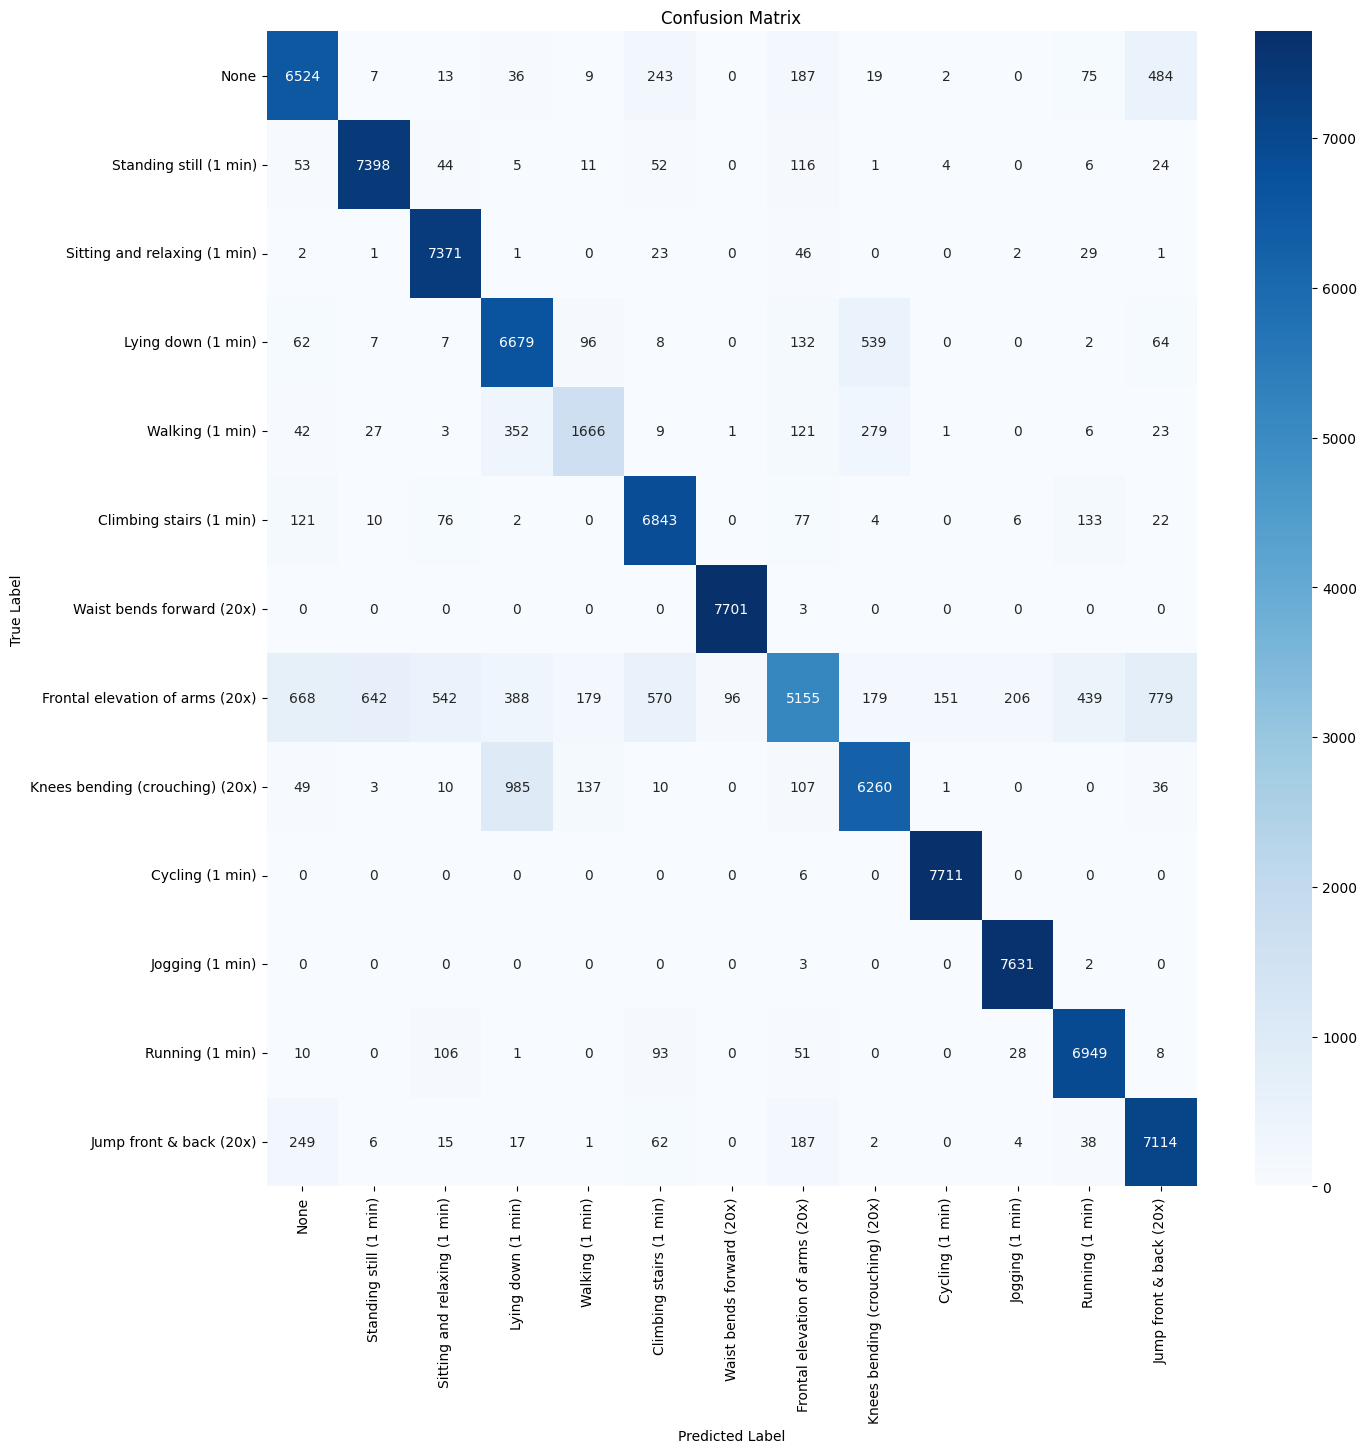

Accuracy Score: 88.7295%
Precision Score: 88.1872%
Recall Score: 88.4682%
F1 Score: 87.9118%


In [54]:
# KNN is Lazy Learner : More Time on Testing/Prediction Phase and Less Time during Prediction
# More Accurate than Logistic Regression
y_pred_knn1 = knn1.predict(X_test)
resultsSummarizer(y_test,y_pred_knn1)

In [55]:
# Trying with Scaled Version (More Accuracy with Robust Scaler than Normal Train and Test)

# Testing for one k value, k=5
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train_scaled,y_train)
y_pred_knn2 = knn2.predict(X_test_scaled)
resultsSummarizer(y_test,y_pred_knn2,cm_enable=False)

Accuracy Score: 93.9185%
Precision Score: 93.7384%
Recall Score: 93.6381%
F1 Score: 93.3335%


In [56]:
# Testing for multiple k values [helps find optimal k value for more accuracy]
for n in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train_scaled,y_train)
  y_pred = knn.predict(X_test_scaled)

  print(f"\n === No Of Neighbors : {n} === \n")
  resultsSummarizer(y_test,y_pred,cm_enable=False)


 === No Of Neighbors : 1 === 

Accuracy Score: 94.0615%
Precision Score: 93.7531%
Recall Score: 93.8496%
F1 Score: 93.7046%

 === No Of Neighbors : 2 === 

Accuracy Score: 93.3559%
Precision Score: 93.0625%
Recall Score: 93.1868%
F1 Score: 92.9384%

 === No Of Neighbors : 3 === 

Accuracy Score: 94.2693%
Precision Score: 94.0728%
Recall Score: 94.0536%
F1 Score: 93.7702%

 === No Of Neighbors : 4 === 

Accuracy Score: 93.9551%
Precision Score: 93.7717%
Recall Score: 93.7307%
F1 Score: 93.4240%

 === No Of Neighbors : 5 === 

Accuracy Score: 93.9185%
Precision Score: 93.7384%
Recall Score: 93.6381%
F1 Score: 93.3335%

 === No Of Neighbors : 6 === 

Accuracy Score: 93.6669%
Precision Score: 93.4829%
Recall Score: 93.3707%
F1 Score: 93.0315%

 === No Of Neighbors : 7 === 

Accuracy Score: 93.6043%
Precision Score: 93.4484%
Recall Score: 93.3061%
F1 Score: 92.9721%

 === No Of Neighbors : 8 === 

Accuracy Score: 93.4102%
Precision Score: 93.2595%
Recall Score: 93.0894%
F1 Score: 92.7422%


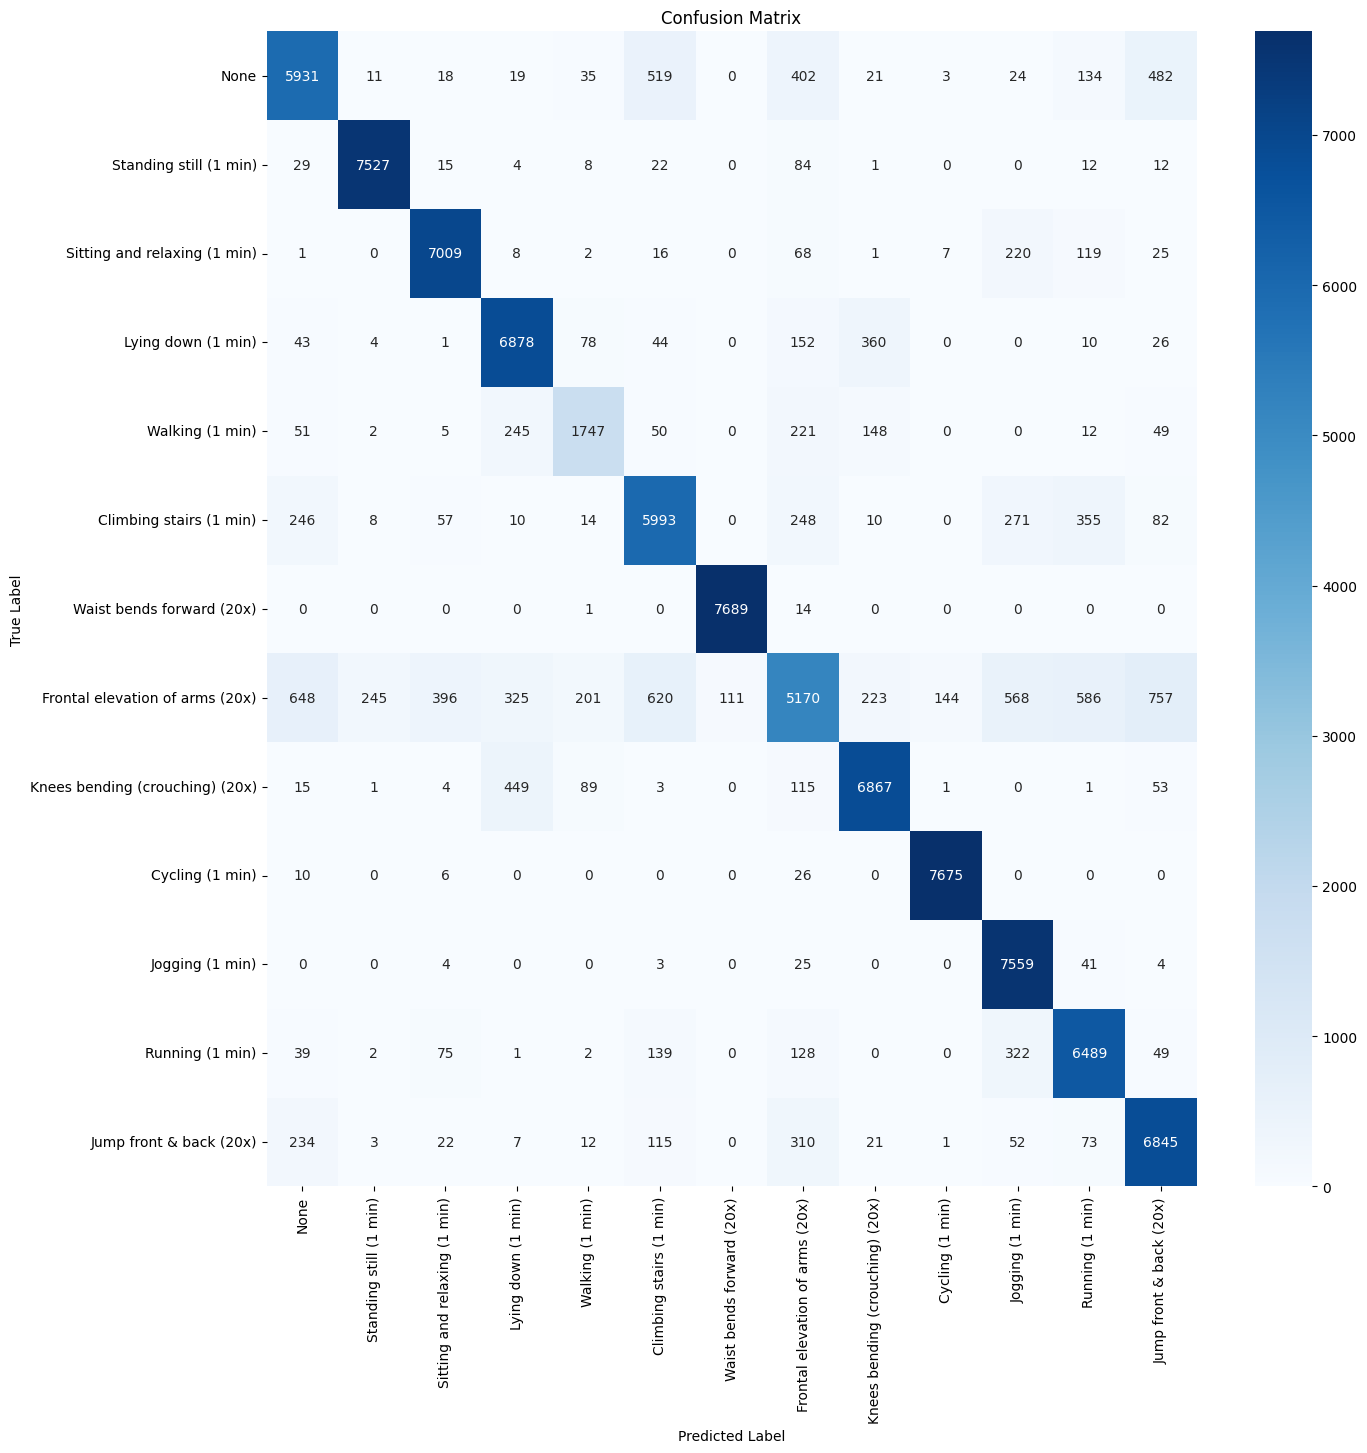

Accuracy Score: 87.0354%
Precision Score: 86.5625%
Recall Score: 86.9239%
F1 Score: 86.4781%


In [59]:
# 3.) Model -> DECISION TREE
dt = DecisionTreeClassifier(max_depth=14)

# Non-scaled version
# Definition: Raw/original data as it comes from your source (CSV, database, sensors)

# Scaled version
# Definition: Data has been transformed so features have a consistent scale (StandardScaler,RobustScaler)


#Trying Non-Scaled Version
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
resultsSummarizer(y_test,y_pred_dt)
